# Embedding Models Exploration for Qdrant / Exploraci√≥n de Modelos de Embedding para Qdrant

**Goal**: Explore different embedding models to determine which one is most suitable for our RAG system for queries about Paraguayan labor law.

**Approach**:
- Compare performance of different embedding models
- Evaluate loading and search speed
- Analyze quality of results for legal queries
- Provide recommendations based on metrics

**Models to Evaluate**:
1. [**sentence-transformers/all-MiniLM-L6-v2**](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) - Light and fast model 
2. [**sentence-transformers/all-mpnet-base-v2**](https://huggingface.co/sentence-transformers/all-mpnet-base-v2) - Balanced model
3. [**sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2**](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2) - Multilingual model
4. [**sentence-transformers/all-MiniLM-L12-v2**](https://huggingface.co/sentence-transformers/all-MiniLM-L12-v2) - Alternative lightweight
5. [**hiiamsid/sentence_similarity_spanish_es**](https://huggingface.co/hiiamsid/sentence_similarity_spanish_es?utm_source=chatgpt.com) - Spanish model
6. [**jinaai/jina-embeddings-v2-base-es**](https://huggingface.co/jinaai/jina-embeddings-v2-base-es?utm_source=chatgpt.com) - Spanish model
7. [**sentence-transformers/distiluse-base-multilingual-cased-v2**](https://huggingface.co/sentence-transformers/distiluse-base-multilingual-cased-v2) - Multilingual model
8. [**intfloat/multilingual-e5-base**](https://huggingface.co/intfloat/multilingual-e5-base) - Multilingual model
9. [**sentence-transformers/paraphrase-multilingual-mpnet-base-v2)**](https://huggingface.co/sentence-transformers/paraphrase-multilingual-mpnet-base-v2) - Multilingual model
10. [**intfloat/multilingual-e5-small**](https://huggingface.co/intfloat/multilingual-e5-small) - Multilingual model
11. [**upskyy/bge-m3-korean**](https://huggingface.co/upskyy/bge-m3-korean) - Multilingual model
12. [**littlejohn-ai/bge-m3-spa-law-qa**](https://huggingface.co/littlejohn-ai/bge-m3-spa-law-qa) - Spanish model
13. [**sentence-transformers/LaBSE**](https://huggingface.co/sentence-transformers/LaBSE) - Multilingual model

---

**Objetivo**: Explorar diferentes modelos de embedding para determinar cu√°l es el m√°s adecuado para nuestro sistema RAG de consultas sobre la ley laboral paraguaya.

**Enfoque**:
- Comparar rendimiento de diferentes modelos de embedding
- Evaluar velocidad de carga y b√∫squeda
- Analizar calidad de resultados para consultas legales
- Proporcionar recomendaciones basadas en m√©tricas

**Modelos a Evaluar**:
1. [**sentence-transformers/all-MiniLM-L6-v2**](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) - Modelo ligero y r√°pido
2. [**sentence-transformers/all-mpnet-base-v2**](https://huggingface.co/sentence-transformers/all-mpnet-base-v2) - Modelo balanceado
3. [**sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2**](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2) - Modelo multiling√ºe
4. [**sentence-transformers/all-MiniLM-L12-v2**](https://huggingface.co/sentence-transformers/all-MiniLM-L12-v2) - Alternativo ligero
5. [**hiiamsid/sentence_similarity_spanish_es**](https://huggingface.co/hiiamsid/sentence_similarity_spanish_es?utm_source=chatgpt.com) - Modelo en Espa√±ol
6. [**jinaai/jina-embeddings-v2-base-es**](https://huggingface.co/jinaai/jina-embeddings-v2-base-es?utm_source=chatgpt.com) - Modelo en Espa√±ol
7. [**sentence-transformers/distiluse-base-multilingual-cased-v2**](https://huggingface.co/sentence-transformers/distiluse-base-multilingual-cased-v2) - Modelo multiling√ºe
8. [**intfloat/multilingual-e5-base**](https://huggingface.co/intfloat/multilingual-e5-base) - Modelo multiling√ºe
9. [**sentence-transformers/paraphrase-multilingual-mpnet-base-v2)**](https://huggingface.co/sentence-transformers/paraphrase-multilingual-mpnet-base-v2) - Modelo multiling√ºe
10. [**intfloat/multilingual-e5-small**](https://huggingface.co/intfloat/multilingual-e5-small) - Modelo multiling√ºe
11. [**upskyy/bge-m3-korean**](https://huggingface.co/upskyy/bge-m3-korean) - Modelo multiling√ºe
12. [**littlejohn-ai/bge-m3-spa-law-qa**](https://huggingface.co/littlejohn-ai/bge-m3-spa-law-qa) - Modelo en Espa√±ol
13. [**sentence-transformers/LaBSE**](https://huggingface.co/sentence-transformers/LaBSE) - Modelo multiling√ºe

## Setup and Configuration / Setup y Configuraci√≥n


In [35]:
# Importaciones necesarias
import os
import time
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import string
import seaborn as sns
from itables import init_notebook_mode, show
from typing import List, Dict, Any, Tuple
from pathlib import Path
from dotenv import load_dotenv

# OpenAI
from openai import OpenAI

# Qdrant y modelos de embedding
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams, PointStruct
from qdrant_client.http import models as rest
from sentence_transformers import SentenceTransformer

# Configuraci√≥n de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

init_notebook_mode(all_interactive=True)

print("Librer√≠as importadas exitosamente")

Librer√≠as importadas exitosamente


In [36]:
def load_env_from_parent(levels_up=1, env_filename=".env"):
    """
    Carga un archivo .env ubicado varios niveles arriba de este script.
    """
    # Obtener ruta actual de trabajo
    current_path = Path.cwd()
    
    # Subir 'levels_up' niveles
    env_path = current_path
    for _ in range(levels_up):
        env_path = env_path.parent
    env_path = env_path / env_filename
    
    if env_path.exists():
        load_dotenv(dotenv_path=env_path)
        print(f"Variables de entorno cargadas desde: {env_path}")
    else:
        print(f"Archivo {env_filename} no encontrado en: {env_path}")

# Uso
load_env_from_parent()

Variables de entorno cargadas desde: /home/joviedo/github-repos/lus-laboris-py/.env


In [34]:
# Configuraci√≥n de conexi√≥n a Qdrant
QDRANT_URL = os.getenv('QDRANT_URL')
QDRANT_API_KEY = os.getenv('QDRANT_API_KEY')

# Configuraci√≥n de modelos a probar
MODELS_TO_TEST = {
    'all-MiniLM-L6-v2': {
        'name': 'sentence-transformers/all-MiniLM-L6-v2',
        'description': 'Modelo ligero y r√°pido',
        'dimension': 384
    },
    'all-mpnet-base-v2': {
        'name': 'sentence-transformers/all-mpnet-base-v2', 
        'description': 'Modelo balanceado',
        'dimension': 768
    },
    'paraphrase-multilingual-MiniLM-L12-v2': {
        'name': 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2',
        'description': 'Modelo multiling√ºe',
        'dimension': 384
    },
    'all-MiniLM-L12-v2': {
        'name': 'sentence-transformers/all-MiniLM-L12-v2',
        'description': 'Alternativo ligero',
        'dimension': 384
    },
    'sentence_similarity_spanish_es': {
        'name': 'hiiamsid/sentence_similarity_spanish_es',
        'description': 'Modelo en espa√±ol',
        'dimension': 768
    },
    'jina-embeddings-v2-base-es': {
        'name': 'jinaai/jina-embeddings-v2-base-es',
        'description': 'Modelo en espa√±ol',
        'dimension': 768
    },
    'distiluse-base-multilingual-cased-v2': {
        'name': 'sentence-transformers/distiluse-base-multilingual-cased-v2',
        'description': 'Modelo multiling√ºe',
        'dimension': 512
    },
    'multilingual-e5-base': {
        'name': 'intfloat/multilingual-e5-base',
        'description': 'Modelo multiling√ºe',
        'dimension': 768
    },
    'paraphrase-multilingual-mpnet-base-v2': {
        'name': 'sentence-transformers/paraphrase-multilingual-mpnet-base-v2',
        'description': 'Modelo multiling√ºe',
        'dimension': 768
    },
    'multilingual-e5-small': {
        'name': 'intfloat/multilingual-e5-small',
        'description': 'Modelo multiling√ºe',
        'dimension': 384
    },
    'bge-m3-korean': {
        'name': 'upskyy/bge-m3-korean',
        'description': 'Modelo multiling√ºe',
        'dimension': 1024
    },
    'bge-m3-spa-law-qa': {
        'name': 'littlejohn-ai/bge-m3-spa-law-qa',
        'description': 'Modelo en espa√±ol',
        'dimension': 1024
    },
    'LaBSE': {
        'name': 'sentence-transformers/LaBSE',
        'description': 'Modelo multiling√ºe',
        'dimension': 768
    }
}
    
print(f"Conectando a Qdrant en: {QDRANT_URL}")
print(f"Modelos a evaluar: {len(MODELS_TO_TEST)}")


Conectando a Qdrant en: http://localhost:6333
Modelos a evaluar: 13


## Loading Labor Law Data from Paraguay / Carga de datos de la Ley Laboral Paraguaya

In [33]:
# Cargar datos reales de la ley laboral paraguaya
def load_labor_law_data(json_path="../data/processed/codigo_trabajo_articulos.json"):
    """Cargar y procesar los datos reales de la ley laboral"""
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            law_data = json.load(f)
        
        print(f"Datos cargados exitosamente desde: {json_path}")
        print(f"Metadatos de la ley: {law_data['meta']}")
        print(f"Total de art√≠culos: {len(law_data['articulos'])}")
        
        return law_data
    except Exception as e:
        print(f"Error cargando datos: {e}")
        return None

# Cargar datos reales
law_data = load_labor_law_data()

Datos cargados exitosamente desde: ../data/processed/codigo_trabajo_articulos.json
Metadatos de la ley: {'numero_ley': '213', 'fecha_promulgacion': '29-06-1993', 'fecha_publicacion': '29-10-1993'}
Total de art√≠culos: 410


In [5]:
law_data['articulos'][:2]

[{'articulo_numero': 1,
  'libro': 'libro primero',
  'libro_numero': 1,
  'titulo': 'titulo primero',
  'capitulo': 'capitulo i',
  'capitulo_numero': 1,
  'capitulo_descripcion': 'del objeto y aplicaci√≥n del c√≥digo',
  'articulo': 'este c√≥digo tiene por objeto establecer normas para regular las relaciones entre los trabajadores y empleadores, concernientes a la prestaci√≥n subordinada y retribuida de la actividad laboral.'},
 {'articulo_numero': 2,
  'libro': 'libro primero',
  'libro_numero': 1,
  'titulo': 'titulo primero',
  'capitulo': 'capitulo i',
  'capitulo_numero': 1,
  'capitulo_descripcion': 'del objeto y aplicaci√≥n del c√≥digo',
  'articulo': 'estar√°n sujetos a las disposiciones del presente c√≥digo:los trabajadores intelectuales, manuales o t√©cnicos en relaci√≥n de dependencia y sus empleadores. los profesores de institutos de ense√±anza privada y quienes ejerzan la pr√°ctica deportiva profesional.los sindicatos de trabajadores y empleadores del sector privado.los 

## Selecting Sample Articles and Test Queries / Selecci√≥n de art√≠culos y consultas de prueba

In [6]:
# Extraer textos de los art√≠culos para las pruebas
# Usar una muestra representativa de diferentes cap√≠tulos
articles_by_chapter = {}
for article in law_data['articulos']:
    chapter = article['capitulo_descripcion']
    if chapter not in articles_by_chapter:
        articles_by_chapter[chapter] = []
    articles_by_chapter[chapter].append(article)

In [11]:
len(articles_by_chapter), type(articles_by_chapter)

(31, dict)

In [12]:
articles_by_chapter['definici√≥n, sujetos y objetos'][:2]

[{'articulo_numero': 16,
  'libro': 'libro primero',
  'libro_numero': 1,
  'titulo': 'titulo segundo',
  'capitulo': 'capitulo i',
  'capitulo_numero': 1,
  'capitulo_descripcion': 'definici√≥n, sujetos y objetos',
  'articulo': 'el estado tomar√° a su cargo brindar educaci√≥n profesional y t√©cnica a trabajadores de modo a perfeccionar sus aptitudes para obtener mejores ingresos y una mayor eficiencia en la producci√≥n.mediante una pol√≠tica econ√≥mica adecuada procurar√° igualmente mantener un justo equilibrio de la oferta y la demanda de mano de obra, dar empleo apropiado a los trabajadores desocupados o no ocupados plenamente por causas ajenas a su voluntad, a los minusv√°lidos f√≠sicos y ps√≠quicos, ancianos y veteranos de la guerra.'},
 {'articulo_numero': 17,
  'libro': 'libro primero',
  'libro_numero': 1,
  'titulo': 'titulo segundo',
  'capitulo': 'capitulo i',
  'capitulo_numero': 1,
  'capitulo_descripcion': 'definici√≥n, sujetos y objetos',
  'articulo': 'contrato de trab

In [13]:
# Seleccionar art√≠culos representativos de diferentes cap√≠tulos
SAMPLE_LEGAL_TEXTS = []
selected_articles = []
cant_capitulo = 8

for chapter, articles in list(articles_by_chapter.items())[:cant_capitulo]:  # Primeros 8 cap√≠tulo
    # Tomar 1-4 art√≠culos por cap√≠tulo
    sample_size = min(4, len(articles))
    chapter_articles = articles[:sample_size]
    
    for article in chapter_articles:
        SAMPLE_LEGAL_TEXTS.append(f"{chapter}: {article['articulo']}")
        selected_articles.append({
            'libro': article['libro'],
            'titulo': article['titulo'],
            'capitulo': article['capitulo'],
            'capitulo_descripcion': chapter,
            'articulo_numero': article['articulo_numero'],
            'articulo': article['articulo'][:80] + "..."  # Preview
        })

In [14]:
SAMPLE_LEGAL_TEXTS[-2], selected_articles[-2]

('del per√≠odo de prueba en la etapa inicial del contrato: establ√©cese en la etapa inicial del contrato de trabajo, un per√≠odo de prueba que tendr√° por objeto respecto\xa0del empleador, apreciar las aptitudes del trabajador y, de parte de √©ste, verificar la conveniencia de las condiciones del trabajo\xa0contratado.dicho per√≠odo tendr√° como m√°ximo la siguiente duraci√≥n:a) de treinta d√≠as para el personal del servicio dom√©stico y trabajadores no calificados;b) de sesenta d√≠as, para trabajadores calificados o para aprendices; y,c) trat√°ndose de trabajadores t√©cnicos altamente especializados, las partes podr√°n convenir un per√≠odo distinto del anterior,\xa0conforme a las modalidades del trabajo contratado.',
 {'libro': 'libro primero',
  'titulo': 'titulo segundo',
  'capitulo': 'capitulo vi',
  'capitulo_descripcion': 'del per√≠odo de prueba en la etapa inicial del contrato',
  'articulo_numero': 58,
  'articulo': 'establ√©cese en la etapa inicial del contrato de trabajo, un

In [15]:
# Inicializa el cliente de OpenAI (asegurate de tener OPENAI_API_KEY en tu entorno)
client = OpenAI()

print("Modelos disponibles para usar")
print([m.id for m in client.models.list()])

Modelos disponibles para usar
['gpt-4o-mini', 'gpt-4.1']


In [23]:
def parse_model_response(response_text: str):
    # Eliminar triple backticks y etiqueta opcional
    cleaned = re.sub(r"```(?:json)?", "", response_text).strip()
    
    # Parsear JSON
    return json.loads(cleaned)


def generate_semantic_questions(chapters_dict, cant_chapters, max_article=4):
    """
    Genera 2 preguntas por cap√≠tulo que apunten a los primeros 4 art√≠culos del cap√≠tulo.
    """
    questions = []
    chapters = dict(list(chapters_dict.items())[:cant_chapters])

    for chapter, top_articles in chapters.items():
        
        prompt = f"""
        Genera 2 preguntas sobre el siguiente cap√≠tulo: "{chapter}".
        Cada pregunta debe poder ser respondida usando alguno de los {max_article} primeros art√≠culos.
        
        Responde como un array de JSON, respetando la siguiente estructura:
        <FOMRATO_SALIDAD>
        [
            {{"question": "...", target_article": numero_articulo}},
            {{"question": "...", "target_article": numero_articulo}}
        ]
        </FOMRATO_SALIDAD>
        
        Cap√≠tulo texto resumido de los primeros 4 art√≠culos: 
        {json.dumps([a['articulo'] for a in top_articles], ensure_ascii=False)}
        """
        
        response = client.responses.create(
            model="gpt-4o-mini",
            input=[
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "input_text",
                            "text": prompt
                        }
                    ]
                }
            ]
        )

        # Obtener texto de la respuesta
        content = response.output_text

        chapter_questions = parse_model_response(content)
        for q in chapter_questions:
            questions.append({
                "question": q["question"],
                "chapter": chapter,
                "target_articulo": q["target_article"]
            })
    
    return questions

In [24]:
# Ejecutar una sola vez:
# Genera un conjunto inicial de preguntas sem√°nticas dise√±adas para obtener 
# buenos resultados a partir de los `selected_articles`.
# Estas preguntas se usan como dataset de referencia para evaluar la calidad 
# de los embeddings y las b√∫squedas en Qdrant.
# Copia el resultado en la variable queries_and_responses

#generated_questions = generate_semantic_questions(articles_by_chapter, cant_capitulo)
#generated_questions

[{'question': '¬øCu√°l es el objetivo principal del c√≥digo en relaci√≥n con las relaciones laborales?',
  'chapter': 'del objeto y aplicaci√≥n del c√≥digo',
  'target_articulo': 1},
 {'question': '¬øQu√© tipos de trabajadores est√°n sujetos a las disposiciones de este c√≥digo?',
  'chapter': 'del objeto y aplicaci√≥n del c√≥digo',
  'target_articulo': 2},
 {'question': '¬øQu√© debe prevalecer en caso de dudas sobre la interpretaci√≥n o aplicaci√≥n de las normas de trabajo?',
  'chapter': 'del trabajo y sus garant√≠as',
  'target_articulo': 1},
 {'question': '¬øC√≥mo se define el trabajo seg√∫n este cap√≠tulo?',
  'chapter': 'del trabajo y sus garant√≠as',
  'target_articulo': 2},
 {'question': '¬øQui√©nes son los sujetos que celebran el contrato de trabajo?',
  'chapter': 'definici√≥n, sujetos y objetos',
  'target_articulo': 5},
 {'question': '¬øQu√© se considera como el objeto del contrato de trabajo?',
  'chapter': 'definici√≥n, sujetos y objetos',
  'target_articulo': 12},
 {'ques

In [60]:
queries_and_responses = [
 {'question': '¬øCu√°l es el objetivo principal del c√≥digo en relaci√≥n con las relaciones laborales?',
  'chapter': 'del objeto y aplicaci√≥n del c√≥digo',
  'target_articulo': 1},
 {'question': '¬øQu√© tipos de trabajadores est√°n sujetos a las disposiciones de este c√≥digo?',
  'chapter': 'del objeto y aplicaci√≥n del c√≥digo',
  'target_articulo': 2},
 {'question': '¬øQu√© debe prevalecer en caso de dudas sobre la interpretaci√≥n o aplicaci√≥n de las normas de trabajo?',
  'chapter': 'del trabajo y sus garant√≠as',
  'target_articulo': 1},
 {'question': '¬øC√≥mo se define el trabajo?',
  'chapter': 'del trabajo y sus garant√≠as',
  'target_articulo': 2},
 {'question': '¬øQui√©nes son los sujetos que celebran el contrato de trabajo?',
  'chapter': 'definici√≥n, sujetos y objetos',
  'target_articulo': 5},
 {'question': '¬øQu√© se considera como el objeto del contrato de trabajo?',
  'chapter': 'definici√≥n, sujetos y objetos',
  'target_articulo': 12},
 {'question': '¬øQui√©nes tienen plena capacidad para celebrar un contrato de trabajo seg√∫n el art√≠culo 2?',
  'chapter': 'de la capacidad para contratar',
  'target_articulo': 2},
 {'question': '¬øQu√© condiciones deben cumplirse para que un menor entre en un contrato de trabajo seg√∫n el art√≠culo 3?',
  'chapter': 'de la capacidad para contratar',
  'target_articulo': 3},
 {'question': '¬øQu√© caracter√≠sticas debe tener un contrato de trabajo para ser v√°lido seg√∫n la voluntad de las partes?',
  'chapter': 'de las limitaciones a la libertad contractual',
  'target_articulo': 2},
 {'question': '¬øQu√© tipo de cl√°usulas se consideran nulas en un contrato laboral?',
  'chapter': 'de las limitaciones a la libertad contractual',
  'target_articulo': 4},
 {'question': '¬øQu√© ocurre si una parte del contrato de trabajo resulta nula?',
  'chapter': 'de las modalidades del contrato',
  'target_articulo': 1},
 {'question': '¬øCu√°ndo es obligatorio que un contrato de trabajo se realice por escrito?',
  'chapter': 'de las modalidades del contrato',
  'target_articulo': 2},
 {'question': '¬øQu√© autorizaci√≥n necesita el jefe elegido del grupo para gestionar el salario global?',
  'chapter': 'de los gastos del contrato',
  'target_articulo': 1},
 {'question': '¬øBajo qu√© condiciones el empleador est√° exento de pagar los gastos de traslado al trabajador?',
  'chapter': 'de los gastos del contrato',
  'target_articulo': 2},
 {'question': '¬øCu√°l es la duraci√≥n m√°xima del per√≠odo de prueba para trabajadores no calificados?',
  'chapter': 'del per√≠odo de prueba en la etapa inicial del contrato',
  'target_articulo': 2},
 {'question': '¬øQu√© debe ocurrir al t√©rmino del per√≠odo de prueba si ninguna de las partes manifiesta su voluntad de terminar el contrato?',
  'chapter': 'del per√≠odo de prueba en la etapa inicial del contrato',
  'target_articulo': 3}
]

In [29]:
# Consultas espec√≠ficas basadas en el contenido real de la ley
SAMPLE_QUERIES = [queries['question'] for queries in queries_and_responses]

print(f"\nResumen de datos cargados:")
print(f"\tTextos seleccionados: {len(SAMPLE_LEGAL_TEXTS)}")
print(f"\tConsultas de prueba: {len(SAMPLE_QUERIES)}")
print(f"\tCap√≠tulos representados: {len(articles_by_chapter)}")


Resumen de datos cargados:
	Textos seleccionados: 29
	Consultas de prueba: 16
	Cap√≠tulos representados: 31


In [32]:
# Mostrar algunos art√≠culos seleccionados
print(f"\nArt√≠culos seleccionados para las pruebas:")
for i, article in enumerate(selected_articles[:5]):
    print(f"{i+1}. Art√≠culo {article['articulo_numero']} - {article['capitulo']}")
    print(f"   {article['articulo']}")
    print()


Art√≠culos seleccionados para las pruebas:
1. Art√≠culo 1 - capitulo i
   este c√≥digo tiene por objeto establecer normas para regular las relaciones entre...

2. Art√≠culo 2 - capitulo i
   estar√°n sujetos a las disposiciones del presente c√≥digo:los trabajadores intelec...

3. Art√≠culo 3 - capitulo i
   los derechos reconocidos por este c√≥digo a los trabajadores no podr√°n ser objeto...

4. Art√≠culo 4 - capitulo i
   los reglamentos de f√°bricas o talleres, contratos individuales y colectivos de t...

5. Art√≠culo 7 - capitulo ii
   si se suscitase duda sobre interpretaci√≥n o aplicaci√≥n de las normas de trabajo,...



## Statistical Analysis of Paraguay‚Äôs Labor Law / An√°lisis estad√≠stico de la Ley Laboral Paraguaya

In [37]:
# An√°lisis estad√≠stico de los datos cargados
print("AN√ÅLISIS ESTAD√çSTICO DE LA LEY LABORAL")
print("=" * 50)

# Estad√≠sticas generales
total_articles = len(law_data['articulos'])
total_chapters = len(set(article['capitulo_descripcion'] for article in law_data['articulos']))
total_books = len(set(article['libro'] for article in law_data['articulos'] if article['libro']))

print(f"Libros: {total_books}")
print(f"Cap√≠tulos: {total_chapters}")
print(f"Art√≠culos totales: {total_articles}")

AN√ÅLISIS ESTAD√çSTICO DE LA LEY LABORAL
Libros: 5
Cap√≠tulos: 31
Art√≠culos totales: 410


In [40]:
# Longitud promedio de textos
text_lengths = [len(article['articulo']) for article in law_data['articulos']]
avg_length = np.mean(text_lengths)
min_length = np.min(text_lengths)
max_length = np.max(text_lengths)

print(f"\n Estad√≠sticas de longitud de texto:")
print(f"\tPromedio: {avg_length:.0f} caracteres")
print(f"\tM√≠nimo: {min_length} caracteres")
print(f"\tM√°ximo: {max_length} caracteres")


 Estad√≠sticas de longitud de texto:
	Promedio: 441 caracteres
	M√≠nimo: 61 caracteres
	M√°ximo: 5057 caracteres


In [41]:
# Distribuci√≥n por cap√≠tulos
chapter_counts = {}
for article in law_data['articulos']:
    chapter = article['capitulo_descripcion']
    chapter_counts[chapter] = chapter_counts.get(chapter, 0) + 1

print(f"\nTop 5 cap√≠tulos con m√°s art√≠culos:")
sorted_chapters = sorted(chapter_counts.items(), key=lambda x: x[1], reverse=True)
for i, (chapter, count) in enumerate(sorted_chapters[:5]):
    print(f"\t{i+1}. {chapter}: {count} art√≠culos")


Top 5 cap√≠tulos con m√°s art√≠culos:
	1. de la estabilidad sindical: 41 art√≠culos
	2. de los paros: 36 art√≠culos
	3. del trabajo rural: 35 art√≠culos
	4. del trabajo en las empresas de transporte automotor terrestre: 35 art√≠culos
	5. de la asignaci√≥n familiar: 22 art√≠culos


In [42]:
# Muestra de art√≠culos seleccionados para las pruebas
print(f"\nMuestra seleccionada para pruebas:")
print(f"\tArt√≠culos en muestra: {len(SAMPLE_LEGAL_TEXTS)}")
print(f"\tConsultas de prueba: {len(SAMPLE_QUERIES)}")


Muestra seleccionada para pruebas:
	Art√≠culos en muestra: 29
	Consultas de prueba: 16


In [43]:
sampling_ratio = len(SAMPLE_LEGAL_TEXTS) / total_articles

if sampling_ratio < 0.05:
    print(f"La muestra cubre solo el {sampling_ratio:.2%} de los art√≠culos, ampliar para mayor representatividad")
else:
    print(f"La muestra cubre el {sampling_ratio:.2%} de los art√≠culos, representativa para pruebas")

La muestra cubre el 7.07% de los art√≠culos, representativa para pruebas


## Model Loading and Evaluation / Carga y Evaluaci√≥n de Modelos

In [44]:
class EmbeddingModelEvaluator:
    """Clase para evaluar modelos de embedding"""
    
    def __init__(self, qdrant_url: str, qdrant_api_key: str = None):
        self.qdrant_url = qdrant_url
        self.qdrant_api_key = qdrant_api_key
        self.client = None
        self.results = {}
        
    def connect_qdrant(self):
        """Conectar a Qdrant"""
        try:
            self.client = QdrantClient(
                url=self.qdrant_url,
                api_key=self.qdrant_api_key
            )
            print("Conexi√≥n a Qdrant establecida")
            return True
        except Exception as e:
            print(f"Error conectando a Qdrant: {e}")
            return False
    
    def load_model_and_measure_time(self, model_name: str) -> Tuple[SentenceTransformer, float]:
        """Cargar modelo y medir tiempo de carga"""
        print(f"üì• Cargando modelo: {model_name}")
        start_time = time.time()
        
        try:
            model = SentenceTransformer(model_name)
            load_time = time.time() - start_time
            print(f"‚úÖ Modelo cargado en {load_time:.2f} segundos")
            return model, load_time
        except Exception as e:
            print(f"‚ùå Error cargando modelo {model_name}: {e}")
            return None, 0
    
    def create_embeddings_and_measure_time(self, model: SentenceTransformer, texts: List[str]) -> Tuple[np.ndarray, float]:
        """Crear embeddings y medir tiempo"""
        print(f"üîÑ Generando embeddings para {len(texts)} articulos...")
        start_time = time.time()
        
        embeddings = model.encode(texts, convert_to_tensor=False)
        embedding_time = time.time() - start_time
        
        print(f"‚úÖ Embeddings generados en {embedding_time:.2f} segundos")
        return embeddings, embedding_time

# Inicializar evaluador
evaluator = EmbeddingModelEvaluator(QDRANT_URL, QDRANT_API_KEY)
evaluator.connect_qdrant()

/tmp/ipykernel_85330/505704996.py:13: UserWarning: Api key is used with an insecure connection.
  self.client = QdrantClient(


Conexi√≥n a Qdrant establecida


True

In [61]:
# Ejecutar evaluaci√≥n completa de todos los modelos
model_performance = {}

print("Iniciando evaluaci√≥n de modelos de embedding...")
print("=" * 60)

for model_key, model_config in MODELS_TO_TEST.items():
    print(f"\nEvaluando: {model_config['name']}")
    print(f"Descripci√≥n: {model_config['description']}")
    print("-" * 40)
    
    # Cargar modelo
    model, load_time = evaluator.load_model_and_measure_time(model_config['name'])
    
    if model is None:
        continue
    
    # Generar embeddings
    embeddings, embedding_time = evaluator.create_embeddings_and_measure_time(model, SAMPLE_LEGAL_TEXTS)
    
    # Almacenar resultados
    model_performance[model_key] = {
        'name': model_config['name'],
        'description': model_config['description'],
        'dimension': model_config['dimension'],
        'load_time': load_time,
        'embedding_time': embedding_time,
        'embeddings': embeddings,
        'model': model
    }
    
    print(f"üìä Dimensiones: {embeddings.shape}")
    print(f"‚è±Ô∏è Tiempo total: {load_time + embedding_time:.2f}s")

print("\nEvaluaci√≥n de modelos completada!")
print(f"Modelos evaluados exitosamente: {len(model_performance)}")


Iniciando evaluaci√≥n de modelos de embedding...

Evaluando: sentence-transformers/all-MiniLM-L6-v2
Descripci√≥n: Modelo ligero y r√°pido
----------------------------------------
üì• Cargando modelo: sentence-transformers/all-MiniLM-L6-v2
‚úÖ Modelo cargado en 2.40 segundos
üîÑ Generando embeddings para 29 textos...
‚úÖ Embeddings generados en 0.94 segundos
üìä Dimensiones: (29, 384)
‚è±Ô∏è Tiempo total: 3.34s

Evaluando: sentence-transformers/all-mpnet-base-v2
Descripci√≥n: Modelo balanceado
----------------------------------------
üì• Cargando modelo: sentence-transformers/all-mpnet-base-v2
‚úÖ Modelo cargado en 2.38 segundos
üîÑ Generando embeddings para 29 textos...
‚úÖ Embeddings generados en 10.96 segundos
üìä Dimensiones: (29, 768)
‚è±Ô∏è Tiempo total: 13.34s

Evaluando: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Descripci√≥n: Modelo multiling√ºe
----------------------------------------
üì• Cargando modelo: sentence-transformers/paraphrase-multilingual-Mi

Some weights of BertModel were not initialized from the model checkpoint at jinaai/jina-embeddings-v2-base-es and are newly initialized: ['embeddings.position_embeddings.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.weight', 'encoder.layer.0.output.dense.bias', 'encoder.layer.0.output.dense.weight', 'encoder.layer.1.intermediate.dense.bias', 'encoder.layer.1.intermediate.dense.weight', 'encoder.layer.1.output.LayerNorm.bias', 'encoder.layer.1.output.LayerNorm.weight', 'encoder.layer.1.output.dense.bias', 'encoder.layer.1.output.dense.weight', 'encoder.layer.10.intermediate.dense.bias', 'encoder.layer.10.intermediate.dense.weight', 'encoder.layer.10.output.LayerNorm.bias', 'encoder.layer.10.output.LayerNorm.weight', 'encoder.layer.10.output.dense.bias', 'encoder.layer.10.output.dense.weight', 'encoder.layer.11.intermediate.dense.bias', 'encoder.layer.11.intermedi

‚úÖ Modelo cargado en 3.14 segundos
üîÑ Generando embeddings para 29 textos...
‚úÖ Embeddings generados en 6.31 segundos
üìä Dimensiones: (29, 768)
‚è±Ô∏è Tiempo total: 9.45s

Evaluando: sentence-transformers/distiluse-base-multilingual-cased-v2
Descripci√≥n: Modelo multiling√ºe
----------------------------------------
üì• Cargando modelo: sentence-transformers/distiluse-base-multilingual-cased-v2
‚úÖ Modelo cargado en 2.84 segundos
üîÑ Generando embeddings para 29 textos...
‚úÖ Embeddings generados en 1.48 segundos
üìä Dimensiones: (29, 512)
‚è±Ô∏è Tiempo total: 4.32s

Evaluando: intfloat/multilingual-e5-base
Descripci√≥n: Modelo multiling√ºe
----------------------------------------
üì• Cargando modelo: intfloat/multilingual-e5-base
‚úÖ Modelo cargado en 3.88 segundos
üîÑ Generando embeddings para 29 textos...
‚úÖ Embeddings generados en 5.67 segundos
üìä Dimensiones: (29, 768)
‚è±Ô∏è Tiempo total: 9.55s

Evaluando: sentence-transformers/paraphrase-multilingual-mpnet-base-v2
D

No sentence-transformers model found with name littlejohn-ai/bge-m3-spa-law-qa. Creating a new one with mean pooling.


‚úÖ Embeddings generados en 24.43 segundos
üìä Dimensiones: (29, 1024)
‚è±Ô∏è Tiempo total: 27.41s

Evaluando: littlejohn-ai/bge-m3-spa-law-qa
Descripci√≥n: Modelo en espa√±ol
----------------------------------------
üì• Cargando modelo: littlejohn-ai/bge-m3-spa-law-qa
‚ùå Error cargando modelo littlejohn-ai/bge-m3-spa-law-qa: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/littlejohn-ai/bge-m3-spa-law-qa.
401 Client Error. (Request ID: Root=1-68c7791e-78d723ce56a232ce2aacde2e;90fc0522-1dc0-4e4d-8d92-2fda7fa45450)

Cannot access gated repo for url https://huggingface.co/littlejohn-ai/bge-m3-spa-law-qa/resolve/main/config.json.
Access to model littlejohn-ai/bge-m3-spa-law-qa is restricted. You must have access to it and be authenticated to access it. Please log in.

Evaluando: sentence-transformers/LaBSE
Descripci√≥n: Modelo multiling√ºe
----------------------------------------
üì• Cargando modelo: sentence-transformers/LaBSE
‚úÖ Modelo

## Performance and Speed Analysis / An√°lisis de Rendimiento y Velocidad

In [62]:
# Crear DataFrame con resultados de rendimiento
performance_data = []

for model_key, data in model_performance.items():
    performance_data.append({
        'Modelo': model_key,
        'Nombre Completo': data['name'],
        'Descripci√≥n': data['description'],
        'Dimensiones': data['dimension'],
        'Tiempo Carga (s)': data['load_time'],
        'Tiempo Embedding (s)': data['embedding_time'],
        'Tiempo Total (s)': data['load_time'] + data['embedding_time'],
        'Velocidad (textos/s)': len(SAMPLE_LEGAL_TEXTS) / data['embedding_time']
    })

df_performance = pd.DataFrame(performance_data)
print("\nResumen de Rendimiento de Modelos:")
df_performance.round(3)


Resumen de Rendimiento de Modelos:


Modelo  \
0                        all-MiniLM-L6-v2   
1                       all-mpnet-base-v2   
2   paraphrase-multilingual-MiniLM-L12-v2   
3                       all-MiniLM-L12-v2   
4          sentence_similarity_spanish_es   
5              jina-embeddings-v2-base-es   
6    distiluse-base-multilingual-cased-v2   
7                    multilingual-e5-base   
8   paraphrase-multilingual-mpnet-base-v2   
9                   multilingual-e5-small   
10                          bge-m3-korean   
11                                  LaBSE   

                                      Nombre Completo             Descripci√≥n  \
0              sentence-transformers/all-MiniLM-L6-v2  Modelo ligero y r√°pido   
1             sentence-transformers/all-mpnet-base-v2       Modelo balanceado   
2   sentence-transformers/paraphrase-multilingual-...      Modelo multiling√ºe   
3             sentence-transformers/all-MiniLM-L12-v2      Alternativo ligero   
4             hiiamsid/sentence_similarity_spanish_es       Modelo en espa√±ol   
5                   jinaai/jina-embeddings-v2-base-es       Modelo en espa√±ol   
6   sentence-transformers/distiluse-base-multiling...      Modelo multiling√ºe   
7                       intfloat/multilingual-e5-base      Modelo multiling√ºe   
8   sentence-transformers/paraphrase-multilingual-...      Modelo multiling√ºe   
9                      intfloat/multilingual-e5-small      Modelo multiling√ºe   
10                               upskyy/bge-m3-korean      Modelo multiling√ºe   
11                        sentence-transformers/LaBSE      Modelo multiling√ºe   

    Dimensiones  Tiempo Carga (s)  Tiempo Embedding (s)  Tiempo Total (s)  \
0           384             2.398                 0.944             3.343   
1           768             2.379                10.963            13.341   
2           384             3.349                 1.000             4.349   
3           384             2.355                 0.944             3.298   
4           768             3.800                 5.360             9.160   
5           768             3.142                 6.307             9.449   
6           512             2.839                 1.483             4.322   
7           768             3.883                 5.671             9.554   
8           768             4.400                 3.580             7.981   
9           384             3.680                 1.667             5.347   
10         1024             2.987                24.427            27.414   
11          768             4.027                 6.091            10.118   

    Velocidad (textos/s)  
0                 30.713  
1                  2.645  
2                 28.996  
3                 30.730  
4                  5.411  
5                  4.598  
6                 19.552  
7                  5.114  
8                  8.100  
9                 17.394  
10                 1.187  
11                 4.761

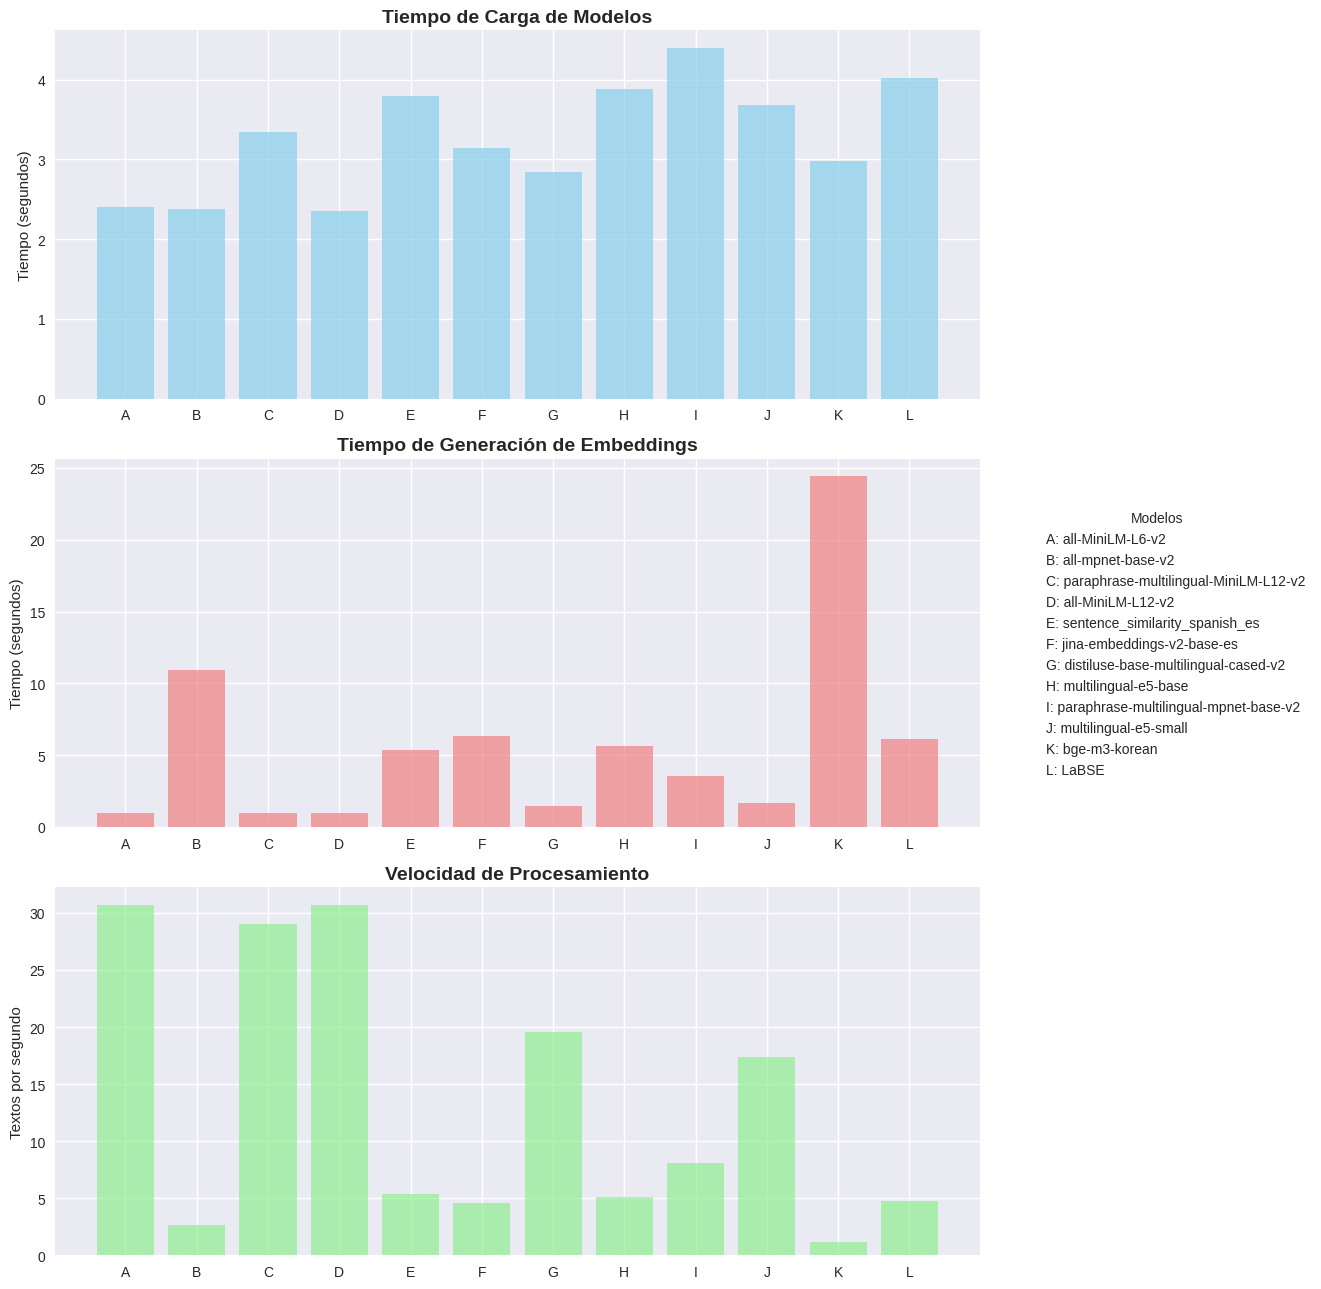


Mejores Rendimientos:
	Carga m√°s r√°pida: all-MiniLM-L12-v2
	Embedding m√°s r√°pido: all-MiniLM-L12-v2
	Mayor velocidad: all-MiniLM-L12-v2


In [63]:
df_performance['Etiqueta'] = list(string.ascii_uppercase[:len(df_performance)])

# Visualizaci√≥n de tiempos de carga y embedding
fig, axes = plt.subplots(3, 1, figsize=(10, 13))

# Gr√°fico 1: Tiempos de carga
axes[0].bar(df_performance['Etiqueta'], df_performance['Tiempo Carga (s)'], 
           color='skyblue', alpha=0.7)
axes[0].set_title('Tiempo de Carga de Modelos', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Tiempo (segundos)')
axes[0].tick_params(axis='x')

# Gr√°fico 2: Tiempos de embedding
axes[1].bar(df_performance['Etiqueta'], df_performance['Tiempo Embedding (s)'], 
           color='lightcoral', alpha=0.7)
axes[1].set_title('Tiempo de Generaci√≥n de Embeddings', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Tiempo (segundos)')
axes[1].tick_params(axis='x')

# Gr√°fico 3: Velocidad de procesamiento
axes[2].bar(df_performance['Etiqueta'], df_performance['Velocidad (textos/s)'], 
           color='lightgreen', alpha=0.7)
axes[2].set_title('Velocidad de Procesamiento', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Textos por segundo')
axes[2].tick_params(axis='x')

plt.tight_layout()

# Crear "handles" para la leyenda (mapeo Etiqueta ‚Üí Modelo)
handles = [mpatches.Patch(color="white", label=f"{row.Etiqueta}: {row.Modelo}")
           for row in df_performance.itertuples()]

# Mostrar la leyenda a la derecha, fuera de los ejes
fig.legend(handles=handles, loc="center left", bbox_to_anchor=(1, 0.5),
           title="Modelos", fontsize=10)

plt.show()

# Mostrar el modelo m√°s r√°pido en cada categor√≠a
print("\nMejores Rendimientos:")
print(f"\tCarga m√°s r√°pida: {df_performance.loc[df_performance['Tiempo Carga (s)'].idxmin(), 'Modelo']}")
print(f"\tEmbedding m√°s r√°pido: {df_performance.loc[df_performance['Tiempo Embedding (s)'].idxmin(), 'Modelo']}")
print(f"\tMayor velocidad: {df_performance.loc[df_performance['Velocidad (textos/s)'].idxmax(), 'Modelo']}")


## Search Quality Evaluation / Evaluaci√≥n de Calidad de B√∫squeda

In [64]:
def calculate_cosine_similarity(embedding1: np.ndarray, embedding2: np.ndarray) -> float:
    """Calcular similitud coseno entre dos embeddings"""
    dot_product = np.dot(embedding1, embedding2)
    norm1 = np.linalg.norm(embedding1)
    norm2 = np.linalg.norm(embedding2)
    return dot_product / (norm1 * norm2)

In [65]:
def evaluate_search_quality(model_data: dict, texts: List[str], queries: List[str]) -> dict:
    """Evaluar calidad de b√∫squeda para un modelo"""
    model = model_data['model']
    text_embeddings = model_data['embeddings']
    
    results = {
        'query_results': [],
        'avg_similarity': 0,
        'search_times': []
    }
    
    for query in queries:
        start_time = time.time()
        
        # Generar embedding para la consulta
        query_embedding = model.encode([query])[0]
        
        # Calcular similitudes con todos los textos
        similarities = []
        for i, text_embedding in enumerate(text_embeddings):
            similarity = calculate_cosine_similarity(query_embedding, text_embedding)
            similarities.append((i, texts[i], similarity))
        
        # Ordenar por similitud descendente
        similarities.sort(key=lambda x: x[2], reverse=True)
        
        search_time = time.time() - start_time
        results['search_times'].append(search_time)
        
        results['query_results'].append({
            'query': query,
            'top_match': similarities[0],
            'all_similarities': similarities,
            'search_time': search_time
        })
    
    # Calcular similitud promedio del mejor resultado
    top_similarities = [result['top_match'][2] for result in results['query_results']]
    results['avg_similarity'] = np.mean(top_similarities)
    results['avg_search_time'] = np.mean(results['search_times'])
    
    return results

In [66]:
# Evaluar calidad de b√∫squeda para todos los modelos
search_quality_results = {}

print("\nEvaluando calidad de b√∫squeda para cada modelo...")
print("=" * 60)

for model_key, model_data in model_performance.items():
    print(f"\nüìä Evaluando b√∫squedas para: {model_key}")
    
    quality_results = evaluate_search_quality(model_data, SAMPLE_LEGAL_TEXTS, SAMPLE_QUERIES)
    search_quality_results[model_key] = quality_results
    
    print(f"‚úÖ Similitud promedio: {quality_results['avg_similarity']:.3f}")
    print(f"‚è±Ô∏è Tiempo promedio de b√∫squeda: {quality_results['avg_search_time']:.4f}s")

print("\nEvaluaci√≥n de calidad completada!")


Evaluando calidad de b√∫squeda para cada modelo...

üìä Evaluando b√∫squedas para: all-MiniLM-L6-v2
‚úÖ Similitud promedio: 0.735
‚è±Ô∏è Tiempo promedio de b√∫squeda: 0.0130s

üìä Evaluando b√∫squedas para: all-mpnet-base-v2
‚úÖ Similitud promedio: 0.716
‚è±Ô∏è Tiempo promedio de b√∫squeda: 0.0517s

üìä Evaluando b√∫squedas para: paraphrase-multilingual-MiniLM-L12-v2
‚úÖ Similitud promedio: 0.774
‚è±Ô∏è Tiempo promedio de b√∫squeda: 0.0167s

üìä Evaluando b√∫squedas para: all-MiniLM-L12-v2
‚úÖ Similitud promedio: 0.722
‚è±Ô∏è Tiempo promedio de b√∫squeda: 0.0209s

üìä Evaluando b√∫squedas para: sentence_similarity_spanish_es
‚úÖ Similitud promedio: 0.661
‚è±Ô∏è Tiempo promedio de b√∫squeda: 0.0453s

üìä Evaluando b√∫squedas para: jina-embeddings-v2-base-es
‚úÖ Similitud promedio: 0.779
‚è±Ô∏è Tiempo promedio de b√∫squeda: 0.1293s

üìä Evaluando b√∫squedas para: distiluse-base-multilingual-cased-v2
‚úÖ Similitud promedio: 0.486
‚è±Ô∏è Tiempo promedio de b√∫squeda: 0.0232s

üìä 

In [68]:
# Mostrar ejemplos de b√∫squedas para cada modelo
print("\nEjemplos de B√∫squedas por Modelo:")
print("=" * 80)

for model_key, quality_data in search_quality_results.items():
    print(f"\nü§ñ Modelo: {model_key}")
    print("-" * 40)
    
    for i, result in enumerate(quality_data['query_results'][1:5]):
        query = result['query']
        top_match = result['top_match']
        similarity = top_match[2]
        matched_text = top_match[1]
        
        print(f"\t‚ùì Consulta {i+1}: {query}")
        print(f"\t\t‚úÖ Mejor coincidencia (similitud: {similarity:.3f}):")
        print(f"\t\tüìù {matched_text[:80]}...")
        print()


Ejemplos de B√∫squedas por Modelo:

ü§ñ Modelo: all-MiniLM-L6-v2
----------------------------------------
	‚ùì Consulta 1: ¬øQu√© tipos de trabajadores est√°n sujetos a las disposiciones de este c√≥digo?
		‚úÖ Mejor coincidencia (similitud: 0.772):
		üìù del objeto y aplicaci√≥n del c√≥digo: estar√°n sujetos a las disposiciones del pres...

	‚ùì Consulta 2: ¬øQu√© debe prevalecer en caso de dudas sobre la interpretaci√≥n o aplicaci√≥n de las normas de trabajo?
		‚úÖ Mejor coincidencia (similitud: 0.814):
		üìù del trabajo y sus garant√≠as: si se suscitase duda sobre interpretaci√≥n o aplicac...

	‚ùì Consulta 3: ¬øC√≥mo se define el trabajo seg√∫n este cap√≠tulo?
		‚úÖ Mejor coincidencia (similitud: 0.726):
		üìù del trabajo y sus garant√≠as: se entiende por trabajo, a los fines de este c√≥digo...

	‚ùì Consulta 4: ¬øQui√©nes son los sujetos que celebran el contrato de trabajo?
		‚úÖ Mejor coincidencia (similitud: 0.712):
		üìù de las modalidades del contrato: el contrato de trab

In [69]:
# Crear una lista para acumular resultados
rows = []

for model_key, quality_data in search_quality_results.items():
    for i, result in enumerate(quality_data['query_results']):
        query = result['query']
        top_match = result['top_match']
        similarity = top_match[2]
        matched_text = top_match[1]

        rows.append({
            "Consulta #": i+1,
            "Similitud": round(similarity,4),
            "Modelo": model_key,
            "Consulta": query,
            "Mejor coincidencia": matched_text[:80] + "..."
        })

# Crear DataFrame
df_busquedas = pd.DataFrame(rows)

# Mostrar en tabla
df_busquedas

Consulta #  Similitud            Modelo  \
0             1     0.8189  all-MiniLM-L6-v2   
1             2     0.7718  all-MiniLM-L6-v2   
2             3     0.8136  all-MiniLM-L6-v2   
3             4     0.7262  all-MiniLM-L6-v2   
4             5     0.7120  all-MiniLM-L6-v2   
..          ...        ...               ...   
187          12     0.5969             LaBSE   
188          13     0.5185             LaBSE   
189          14     0.5647             LaBSE   
190          15     0.5563             LaBSE   
191          16     0.6102             LaBSE   

                                              Consulta  \
0    ¬øCu√°l es el objetivo principal del c√≥digo en r...   
1    ¬øQu√© tipos de trabajadores est√°n sujetos a las...   
2    ¬øQu√© debe prevalecer en caso de dudas sobre la...   
3      ¬øC√≥mo se define el trabajo seg√∫n este cap√≠tulo?   
4    ¬øQui√©nes son los sujetos que celebran el contr...   
..                                                 ...   
187  ¬øCu√°ndo es obligatorio que un contrato de trab...   
188  ¬øQu√© autorizaci√≥n necesita el jefe elegido del...   
189  ¬øBajo qu√© condiciones el empleador est√° exento...   
190  ¬øCu√°l es la duraci√≥n m√°xima del per√≠odo de pru...   
191  ¬øQu√© debe ocurrir al t√©rmino del per√≠odo de pr...   

                                    Mejor coincidencia  
0    del objeto y aplicaci√≥n del c√≥digo: este c√≥dig...  
1    del objeto y aplicaci√≥n del c√≥digo: estar√°n su...  
2    del trabajo y sus garant√≠as: si se suscitase d...  
3    del trabajo y sus garant√≠as: se entiende por t...  
4    de las modalidades del contrato: el contrato d...  
..                                                 ...  
187  de las modalidades del contrato: el contrato d...  
188  de los gastos del contrato: en el caso del art...  
189  de los gastos del contrato: el empleador estar...  
190  del per√≠odo de prueba en la etapa inicial del ...  
191  del per√≠odo de prueba en la etapa inicial del ...  

[192 rows x 5 columns]

In [71]:
# Crear DataFrame con resultados de calidad
quality_data = []
for model_key, quality_results in search_quality_results.items():
    quality_data.append({
        'Modelo': model_key,
        'Similitud Promedio': quality_results['avg_similarity'],
        'Tiempo B√∫squeda (s)': quality_results['avg_search_time'],
        'Consultas/segundo': 1 / quality_results['avg_search_time']
    })

df_quality = pd.DataFrame(quality_data)
print("\nResumen de Calidad de B√∫squeda:")
df_quality.round(3)


Resumen de Calidad de B√∫squeda:


Modelo  Similitud Promedio  \
0                        all-MiniLM-L6-v2               0.735   
1                       all-mpnet-base-v2               0.716   
2   paraphrase-multilingual-MiniLM-L12-v2               0.774   
3                       all-MiniLM-L12-v2               0.722   
4          sentence_similarity_spanish_es               0.661   
5              jina-embeddings-v2-base-es               0.779   
6    distiluse-base-multilingual-cased-v2               0.486   
7                    multilingual-e5-base               0.876   
8   paraphrase-multilingual-mpnet-base-v2               0.776   
9                   multilingual-e5-small               0.900   
10                          bge-m3-korean               0.696   
11                                  LaBSE               0.580   

    Tiempo B√∫squeda (s)  Consultas/segundo  
0                 0.013             77.011  
1                 0.052             19.347  
2                 0.017             59.943  
3                 0.021             47.760  
4                 0.045             22.095  
5                 0.129              7.731  
6                 0.023             43.142  
7                 0.053             18.969  
8                 0.051             19.613  
9                 0.020             49.784  
10                0.164              6.115  
11                0.044             22.783

## Quality Visualizations / Visualizaciones de Calidad


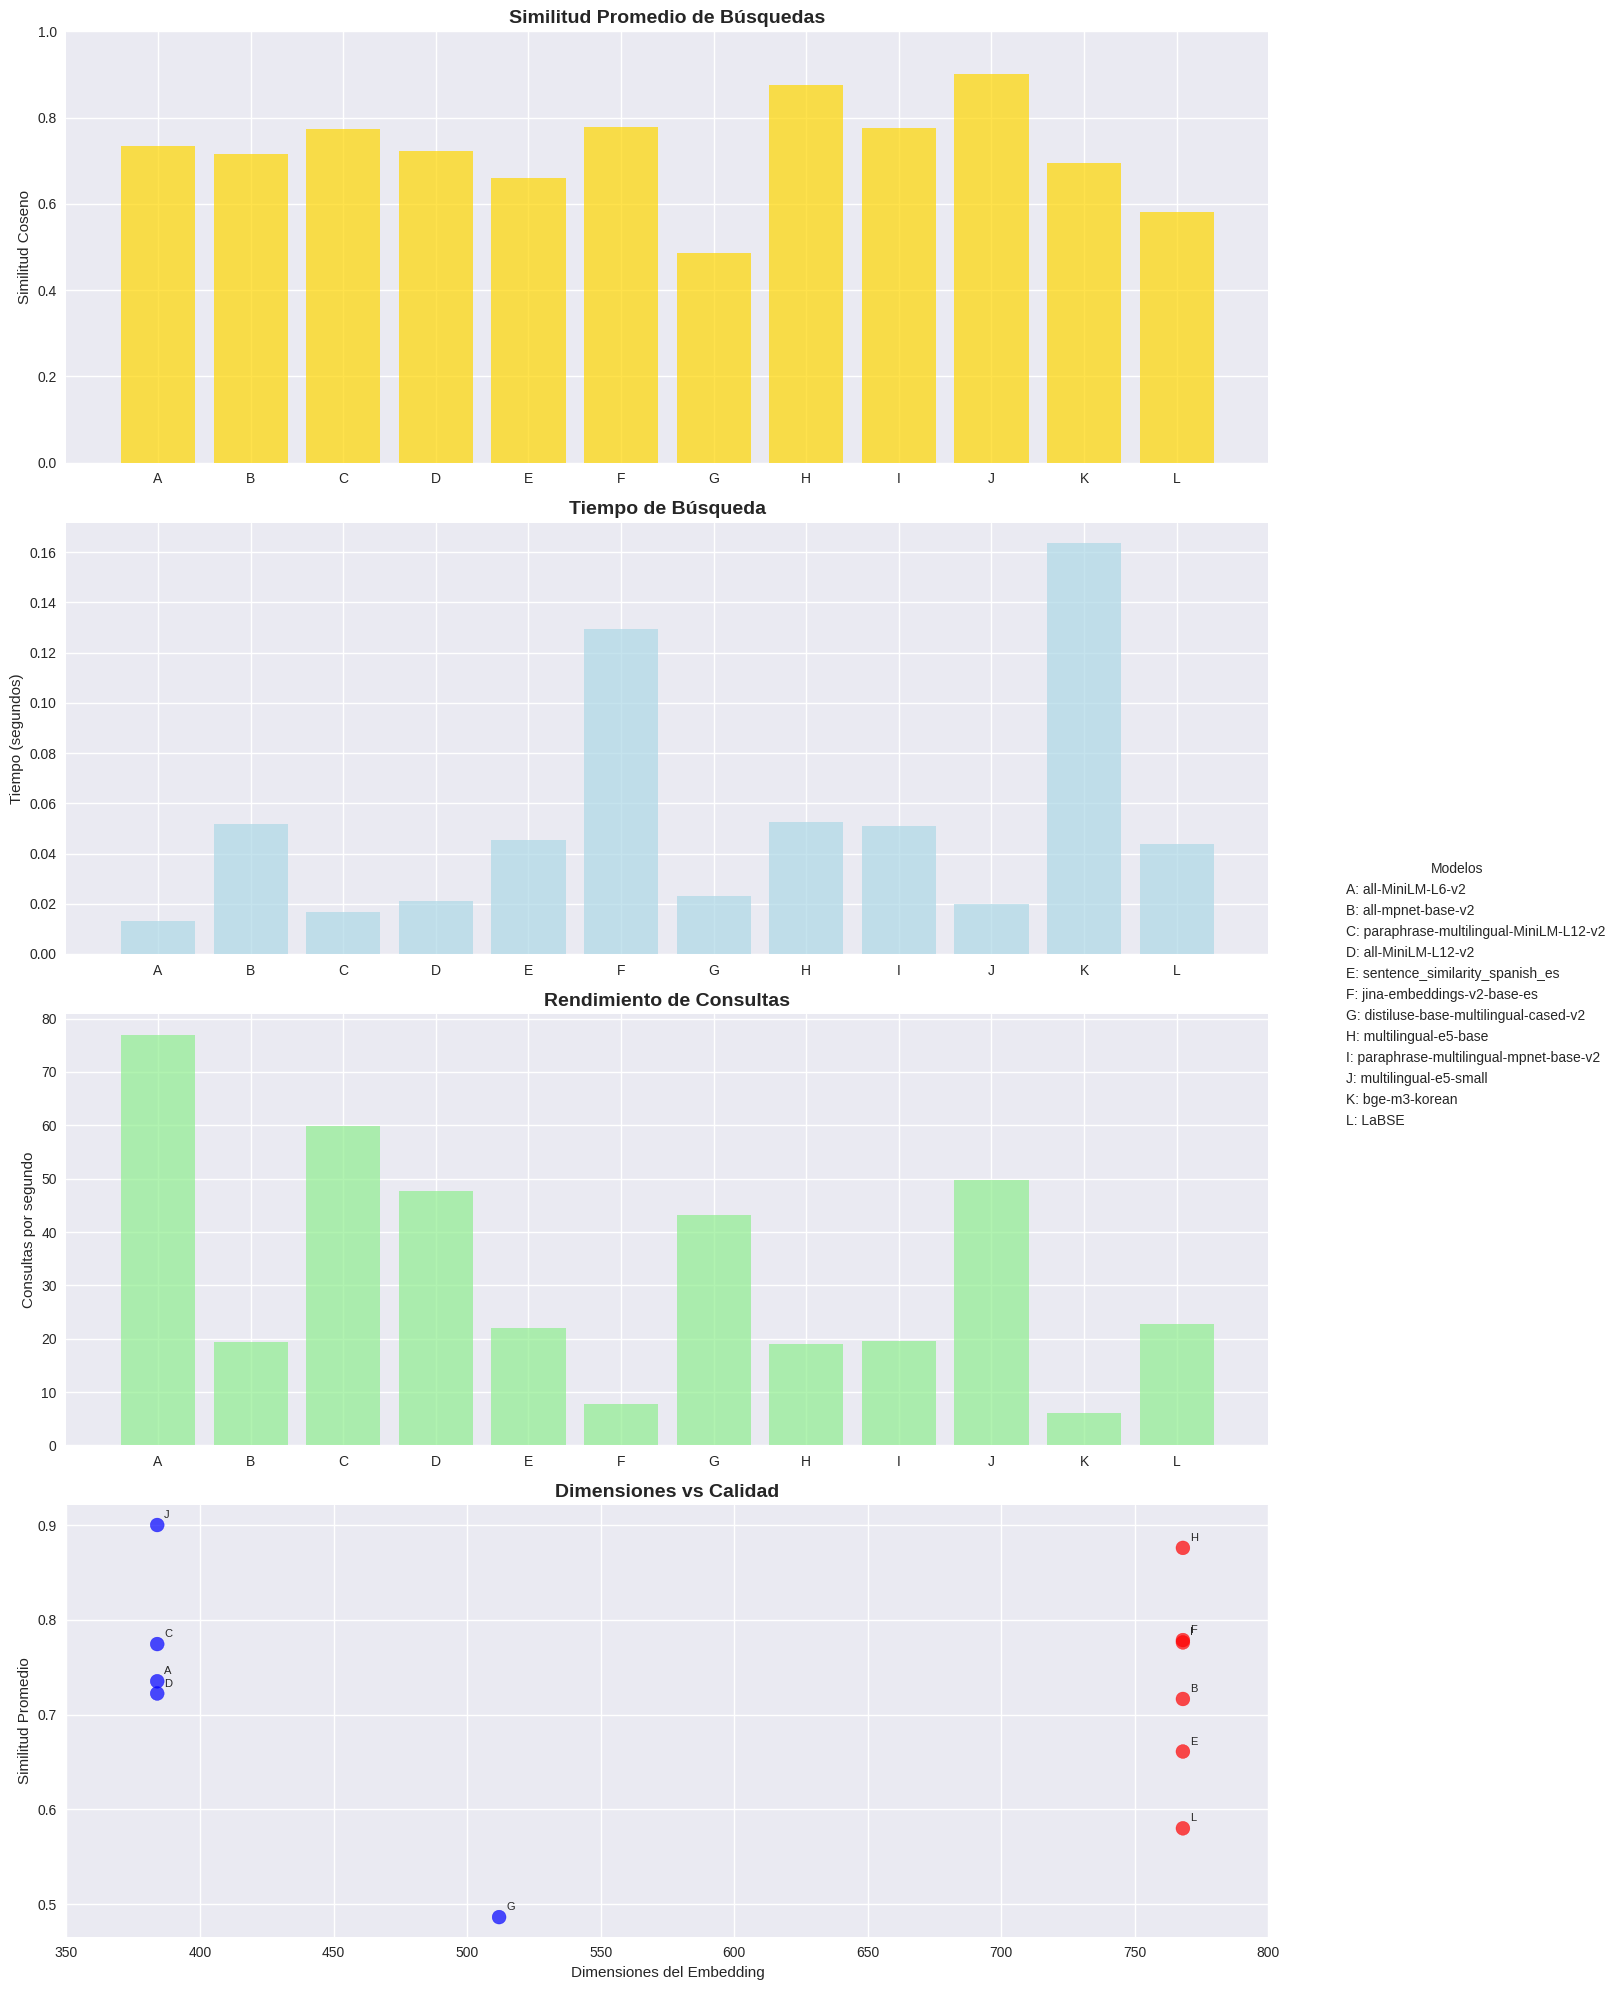


Rankings de Modelos:
	Mayor similitud: multilingual-e5-small
	B√∫squeda m√°s r√°pida: all-MiniLM-L6-v2
	Mayor rendimiento: all-MiniLM-L6-v2


In [74]:
df_quality['Etiqueta'] = list(string.ascii_uppercase[:len(df_quality)])
# Visualizaciones de calidad de b√∫squeda
fig, axes = plt.subplots(4, 1, figsize=(13, 20))

# Gr√°fico 1: Similitud promedio por modelo
axes[0].bar(df_quality['Etiqueta'], df_quality['Similitud Promedio'], 
              color='gold', alpha=0.7)
axes[0].set_title('Similitud Promedio de B√∫squedas', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Similitud Coseno')
axes[0].tick_params(axis='x')
axes[0].set_ylim(0, 1)

# Gr√°fico 2: Tiempo de b√∫squeda por modelo
axes[1].bar(df_quality['Etiqueta'], df_quality['Tiempo B√∫squeda (s)'], 
              color='lightblue', alpha=0.7)
axes[1].set_title('Tiempo de B√∫squeda', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Tiempo (segundos)')
axes[1].tick_params(axis='x')

# Gr√°fico 3: Consultas por segundo
axes[2].bar(df_quality['Etiqueta'], df_quality['Consultas/segundo'], 
              color='lightgreen', alpha=0.7)
axes[2].set_title('Rendimiento de Consultas', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Consultas por segundo')
axes[2].tick_params(axis='x')

# Gr√°fico 4: Comparaci√≥n de dimensiones vs rendimiento
colors = ['red' if d == 768 else 'blue' for d in df_performance['Dimensiones']]
axes[3].scatter(df_performance['Dimensiones'], df_quality['Similitud Promedio'], 
                  c=colors, s=100, alpha=0.7)
axes[3].set_title('Dimensiones vs Calidad', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Dimensiones del Embedding')
axes[3].set_ylabel('Similitud Promedio')
axes[3].set_xlim(350, 800)

# A√±adir etiquetas a los puntos
for i, model in enumerate(df_quality['Etiqueta']):
    axes[3].annotate(model, (df_performance['Dimensiones'].iloc[i], 
                               df_quality['Similitud Promedio'].iloc[i]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()

handles = [mpatches.Patch(color="white", label=f"{row.Etiqueta}: {row.Modelo}")
           for row in df_performance.itertuples()]

# Mostrar la leyenda a la derecha, fuera de los ejes
fig.legend(handles=handles, loc="center left", bbox_to_anchor=(1, 0.5),
           title="Modelos", fontsize=10)

plt.show()

# Mostrar rankings
print("\nRankings de Modelos:")
print("=" * 40)
print(f"\tMayor similitud: {df_quality.loc[df_quality['Similitud Promedio'].idxmax(), 'Modelo']}")
print(f"\tB√∫squeda m√°s r√°pida: {df_quality.loc[df_quality['Tiempo B√∫squeda (s)'].idxmin(), 'Modelo']}")
print(f"\tMayor rendimiento: {df_quality.loc[df_quality['Consultas/segundo'].idxmax(), 'Modelo']}")

## Qdrant Integration / Integraci√≥n con Qdrant

In [86]:
def create_qdrant_collection(client, collection_name, vector_size):

    if client.collection_exists(collection_name):
        client.delete_collection(collection_name)
    
    client.create_collection(
        collection_name=collection_name,
        vectors_config=rest.VectorParams(
            size=best_model_data['dimension'],
            distance=rest.Distance.COSINE
        ),
        timeout=60
    )
    
    print(f"Colecci√≥n '{collection_name}' creada")

In [87]:
# Funci√≥n mejorada para insertar documentos con metadatos reales
def insert_documents_qdrant_collection(client: QdrantClient, collection_name: str, 
                                  texts: List[str], embeddings: np.ndarray, 
                                  articles_metadata: List[dict]):
    """Insertar documentos en Qdrant con metadatos enriquecidos"""
    try:
        points = []
        for i, (text, embedding) in enumerate(zip(texts, embeddings)):
            # Payload base
            payload = {
                "text": text,
                "text_length": len(text),
                "source": "codigo_trabajo_paraguay",
                "index": i
            }
            
            # Agregar metadatos
            article = articles_metadata[i]
            payload.update({
                "libro": article.get('libro'),
                "titulo": article.get('titulo'),
                "capitulo": article.get('capitulo'),
                "capitulo_descripcion": article.get('capitulo_descripcion'),
                "articulo_numero": article.get('articulo_numero'),
                "articulo": text.split(":")[1],
            })
            
            point = PointStruct(
                id=i,
                vector=embedding.tolist(),
                payload=payload
            )
            points.append(point)
        
        # Insertar puntos en lote
        client.upsert(collection_name=collection_name, points=points)
        print(f"{len(points)} documentos insertados en '{collection_name}'")
            
        return True
    except Exception as e:
        print(f"Error insertando documentos en '{collection_name}': {e}")
        return False

In [100]:
def search_qdrant_collection(client: QdrantClient, collection_name: str, 
                      query_embedding: np.ndarray, limit: int = 3):
    """Probar b√∫squeda en Qdrant"""
    try:
        results = client.query_points(
            collection_name=collection_name,
            query=query_embedding,
            limit=limit
        ).points
            
        return results
    except Exception as e:
        print(f"Error en b√∫squeda de '{collection_name}': {e}")
        return None

In [101]:
# Funci√≥n mejorada para mostrar resultados de b√∫squeda
def display_search_results(search_results, show_metadata=True, max_text_len=120):
    """Mostrar resultados de b√∫squeda en Qdrant con metadatos enriquecidos"""
    if not search_results:
        print("No se encontraron resultados")
        return
    
    print("\nResultados de b√∫squeda en Qdrant")
    print("=" * 80)
    
    for i, result in enumerate(search_results, start=1):
        payload = result.payload or {}
        score = result.score
        
        # Texto corto para vista previa
        text_preview = payload.get("articulo").strip()
        if len(text_preview) > max_text_len:
            text_preview = text_preview[:max_text_len] + "..."
        
        print(f"\n{i}. ‚úÖ Similitud: {score:.3f}")
        print(f"\tüìù {text_preview}")
        
        if show_metadata:
            print(f"\tüìñ Libro: {payload.get('libro')}")
            print(f"\tüìö T√≠tulo: {payload.get('titulo')}")
            print(f"\tüìÇ Cap√≠tulo: {payload.get('capitulo')} - {payload.get('capitulo_descripcion')}")
            print(f"\tüìú Art√≠culo N¬∫: {payload.get('articulo_numero')}")


In [91]:
# Integraci√≥n mejorada con Qdrant usando datos reales
print("Probando integraci√≥n con Qdrant...")
print("=" * 60)

# Seleccionar el mejor modelo basado en similitud promedio
best_model_key = df_quality.loc[df_quality['Similitud Promedio'].idxmax(), 'Modelo']
best_model_data = model_performance[best_model_key]

print(f"\nUsando mejor modelo: {best_model_key}")
print(f"\tDimensiones: {best_model_data['dimension']}")
print(f"\tTextos a procesar: {len(SAMPLE_LEGAL_TEXTS)}")

Probando integraci√≥n con Qdrant...

Usando mejor modelo: multilingual-e5-small
	Dimensiones: 384
	Textos a procesar: 29


In [92]:
# Crear colecci√≥n en Qdrant con nombre m√°s descriptivo
collection_name = f"labor_law_{best_model_key.replace('-', '_')}"
success = create_qdrant_collection(
    evaluator.client, 
    collection_name, 
    best_model_data['dimension']
)

Colecci√≥n 'labor_law_multilingual_e5_small' creada


In [93]:
# Insertar documentos con metadatos mejorados
insert_success = insert_documents_qdrant_collection(
    evaluator.client,
    collection_name,
    SAMPLE_LEGAL_TEXTS,
    best_model_data['embeddings'],
    selected_articles
)

29 documentos insertados en 'labor_law_multilingual_e5_small'


In [102]:
# Probar m√∫ltiples b√∫squedas para demostrar la funcionalidad
print(f"\nProbando b√∫squedas con datos reales:")
print("-" * 40)

test_queries = SAMPLE_QUERIES[:3]  # Probar primeras 3 consultas

for i, test_query in enumerate(test_queries):
    print(f"\n{i+1}. Consulta: '{test_query}'")
    
    # Generar embedding para la consulta
    query_embedding = best_model_data['model'].encode([test_query])[0]
    
    # Realizar b√∫squeda
    search_results = search_qdrant_collection(
        evaluator.client,
        collection_name,
        query_embedding,
        limit=3
    )

    # Mostrar resultados con metadatos
    display_search_results(search_results, show_metadata=bool(law_data))


Probando b√∫squedas con datos reales:
----------------------------------------

1. Consulta: '¬øCu√°l es el objetivo principal del c√≥digo en relaci√≥n con las relaciones laborales?'

Resultados de b√∫squeda en Qdrant

1. ‚úÖ Similitud: 0.915
	üìù este c√≥digo tiene por objeto establecer normas para regular las relaciones entre los trabajadores y empleadores, concern...
	üìñ Libro: libro primero
	üìö T√≠tulo: titulo primero
	üìÇ Cap√≠tulo: capitulo i - del objeto y aplicaci√≥n del c√≥digo
	üìú Art√≠culo N¬∫: 1

2. ‚úÖ Similitud: 0.866
	üìù los reglamentos de f√°bricas o talleres, contratos individuales y colectivos de trabajo que establezcan derechos o benefi...
	üìñ Libro: libro primero
	üìö T√≠tulo: titulo primero
	üìÇ Cap√≠tulo: capitulo i - del objeto y aplicaci√≥n del c√≥digo
	üìú Art√≠culo N¬∫: 4

3. ‚úÖ Similitud: 0.865
	üìù se entiende por trabajo, a los fines de este c√≥digo, toda actividad humana, consciente y voluntaria, prestada en forma d...
	üìñ Libro: libro 

In [103]:
print(f"\nEstad√≠sticas de la colecci√≥n:")
print(f"\tDocumentos insertados: {len(SAMPLE_LEGAL_TEXTS)}")
print(f"\tModelo utilizado: {best_model_key}")
print(f"\tConsultas probadas: {len(test_queries)}")


Estad√≠sticas de la colecci√≥n:
	Documentos insertados: 29
	Modelo utilizado: multilingual-e5-small
	Consultas probadas: 3


## Comprehensive Comparative Analysis / üìä An√°lisis Comparativo Completo


In [120]:
# Crear an√°lisis comparativo completo combinando rendimiento y calidad
comparison_df = pd.merge(df_performance[['Modelo', 'Nombre Completo', 
                                         'Descripci√≥n', 'Dimensiones', 
                                        'Tiempo Carga (s)', 'Tiempo Embedding (s)', 
                                         'Velocidad (textos/s)']], 
                        df_quality[['Modelo', 'Similitud Promedio', 
                                    'Tiempo B√∫squeda (s)', 'Consultas/segundo']], 
                        on='Modelo')

# Calcular puntuaciones normalizadas (0-1)
def normalize_score(series, higher_is_better=True):
    if higher_is_better:
        return (series - series.min()) / (series.max() - series.min())
    else:
        return (series.max() - series) / (series.max() - series.min())

# Calcular scores normalizados
comparison_df['Score_Velocidad_Carga'] = normalize_score(comparison_df['Tiempo Carga (s)'], False)
comparison_df['Score_Velocidad_Embedding'] = normalize_score(comparison_df['Tiempo Embedding (s)'], False)
comparison_df['Score_Calidad'] = normalize_score(comparison_df['Similitud Promedio'], True)
comparison_df['Score_Velocidad_Busqueda'] = normalize_score(comparison_df['Tiempo B√∫squeda (s)'], False)

# Score final ponderado (puedes ajustar los pesos seg√∫n tus prioridades)
weights = {
    'calidad': 0.4,      # 40% - Lo m√°s importante para RAG
    'velocidad_busqueda': 0.3,  # 30% - Importante para experiencia de usuario
    'velocidad_embedding': 0.2,  # 20% - Importante para procesamiento batch
    'velocidad_carga': 0.1       # 10% - Menos cr√≠tico (se hace una vez)
}

comparison_df['Score_Final'] = (
    comparison_df['Score_Calidad'] * weights['calidad'] +
    comparison_df['Score_Velocidad_Busqueda'] * weights['velocidad_busqueda'] +
    comparison_df['Score_Velocidad_Embedding'] * weights['velocidad_embedding'] +
    comparison_df['Score_Velocidad_Carga'] * weights['velocidad_carga']
)

# Ordenar por score final
comparison_df = comparison_df.sort_values('Score_Final', ascending=False)

print("\nRanking Final de Modelos de Embedding:")
print("=" * 70)
print(f"{'Pos':<4} {'Score Final':<8}  {'Calidad':<8}  {'Modelo':<25} ")
print("-" * 70)

for i, row in comparison_df.iterrows():
    pos = comparison_df.index.get_loc(i) + 1
    print(f"{pos:<4} {row['Score_Final']:.3f}        {row['Similitud Promedio']:.3f}     {row['Modelo']:<25}")


Ranking Final de Modelos de Embedding:
Pos  Score Final  Calidad   Modelo                    
----------------------------------------------------------------------
1    0.915        0.900     multilingual-e5-small    
2    0.838        0.735     all-MiniLM-L6-v2         
3    0.822        0.774     paraphrase-multilingual-MiniLM-L12-v2
4    0.812        0.722     all-MiniLM-L12-v2        
5    0.783        0.876     multilingual-e5-base     
6    0.682        0.776     paraphrase-multilingual-mpnet-base-v2
7    0.659        0.716     all-mpnet-base-v2        
8    0.596        0.661     sentence_similarity_spanish_es
9    0.567        0.779     jina-embeddings-v2-base-es
10   0.551        0.486     distiluse-base-multilingual-cased-v2
11   0.503        0.580     LaBSE                    
12   0.271        0.696     bge-m3-korean            


In [121]:
print("\nTabla Comparativa Detallada:")
print("=" * 50)

comparison_df[['Modelo', 'Descripci√≥n', 
               'Dimensiones', 'Similitud Promedio', 
               'Tiempo Carga (s)', 'Tiempo Embedding (s)', 
               'Tiempo B√∫squeda (s)', 'Score_Final']].round(3)


Tabla Comparativa Detallada:


Modelo             Descripci√≥n  \
9                   multilingual-e5-small      Modelo multiling√ºe   
0                        all-MiniLM-L6-v2  Modelo ligero y r√°pido   
2   paraphrase-multilingual-MiniLM-L12-v2      Modelo multiling√ºe   
3                       all-MiniLM-L12-v2      Alternativo ligero   
7                    multilingual-e5-base      Modelo multiling√ºe   
8   paraphrase-multilingual-mpnet-base-v2      Modelo multiling√ºe   
1                       all-mpnet-base-v2       Modelo balanceado   
4          sentence_similarity_spanish_es       Modelo en espa√±ol   
5              jina-embeddings-v2-base-es       Modelo en espa√±ol   
6    distiluse-base-multilingual-cased-v2      Modelo multiling√ºe   
11                                  LaBSE      Modelo multiling√ºe   
10                          bge-m3-korean      Modelo multiling√ºe   

    Dimensiones  Similitud Promedio  Tiempo Carga (s)  Tiempo Embedding (s)  \
9           384               0.900             3.680                 1.667   
0           384               0.735             2.398                 0.944   
2           384               0.774             3.349                 1.000   
3           384               0.722             2.355                 0.944   
7           768               0.876             3.883                 5.671   
8           768               0.776             4.400                 3.580   
1           768               0.716             2.379                10.963   
4           768               0.661             3.800                 5.360   
5           768               0.779             3.142                 6.307   
6           512               0.486             2.839                 1.483   
11          768               0.580             4.027                 6.091   
10         1024               0.696             2.987                24.427   

    Tiempo B√∫squeda (s)  Score_Final  
9                 0.020        0.915  
0                 0.013        0.838  
2                 0.017        0.822  
3                 0.021        0.812  
7                 0.053        0.783  
8                 0.051        0.682  
1                 0.052        0.659  
4                 0.045        0.596  
5                 0.129        0.567  
6                 0.023        0.551  
11                0.044        0.503  
10                0.164        0.271

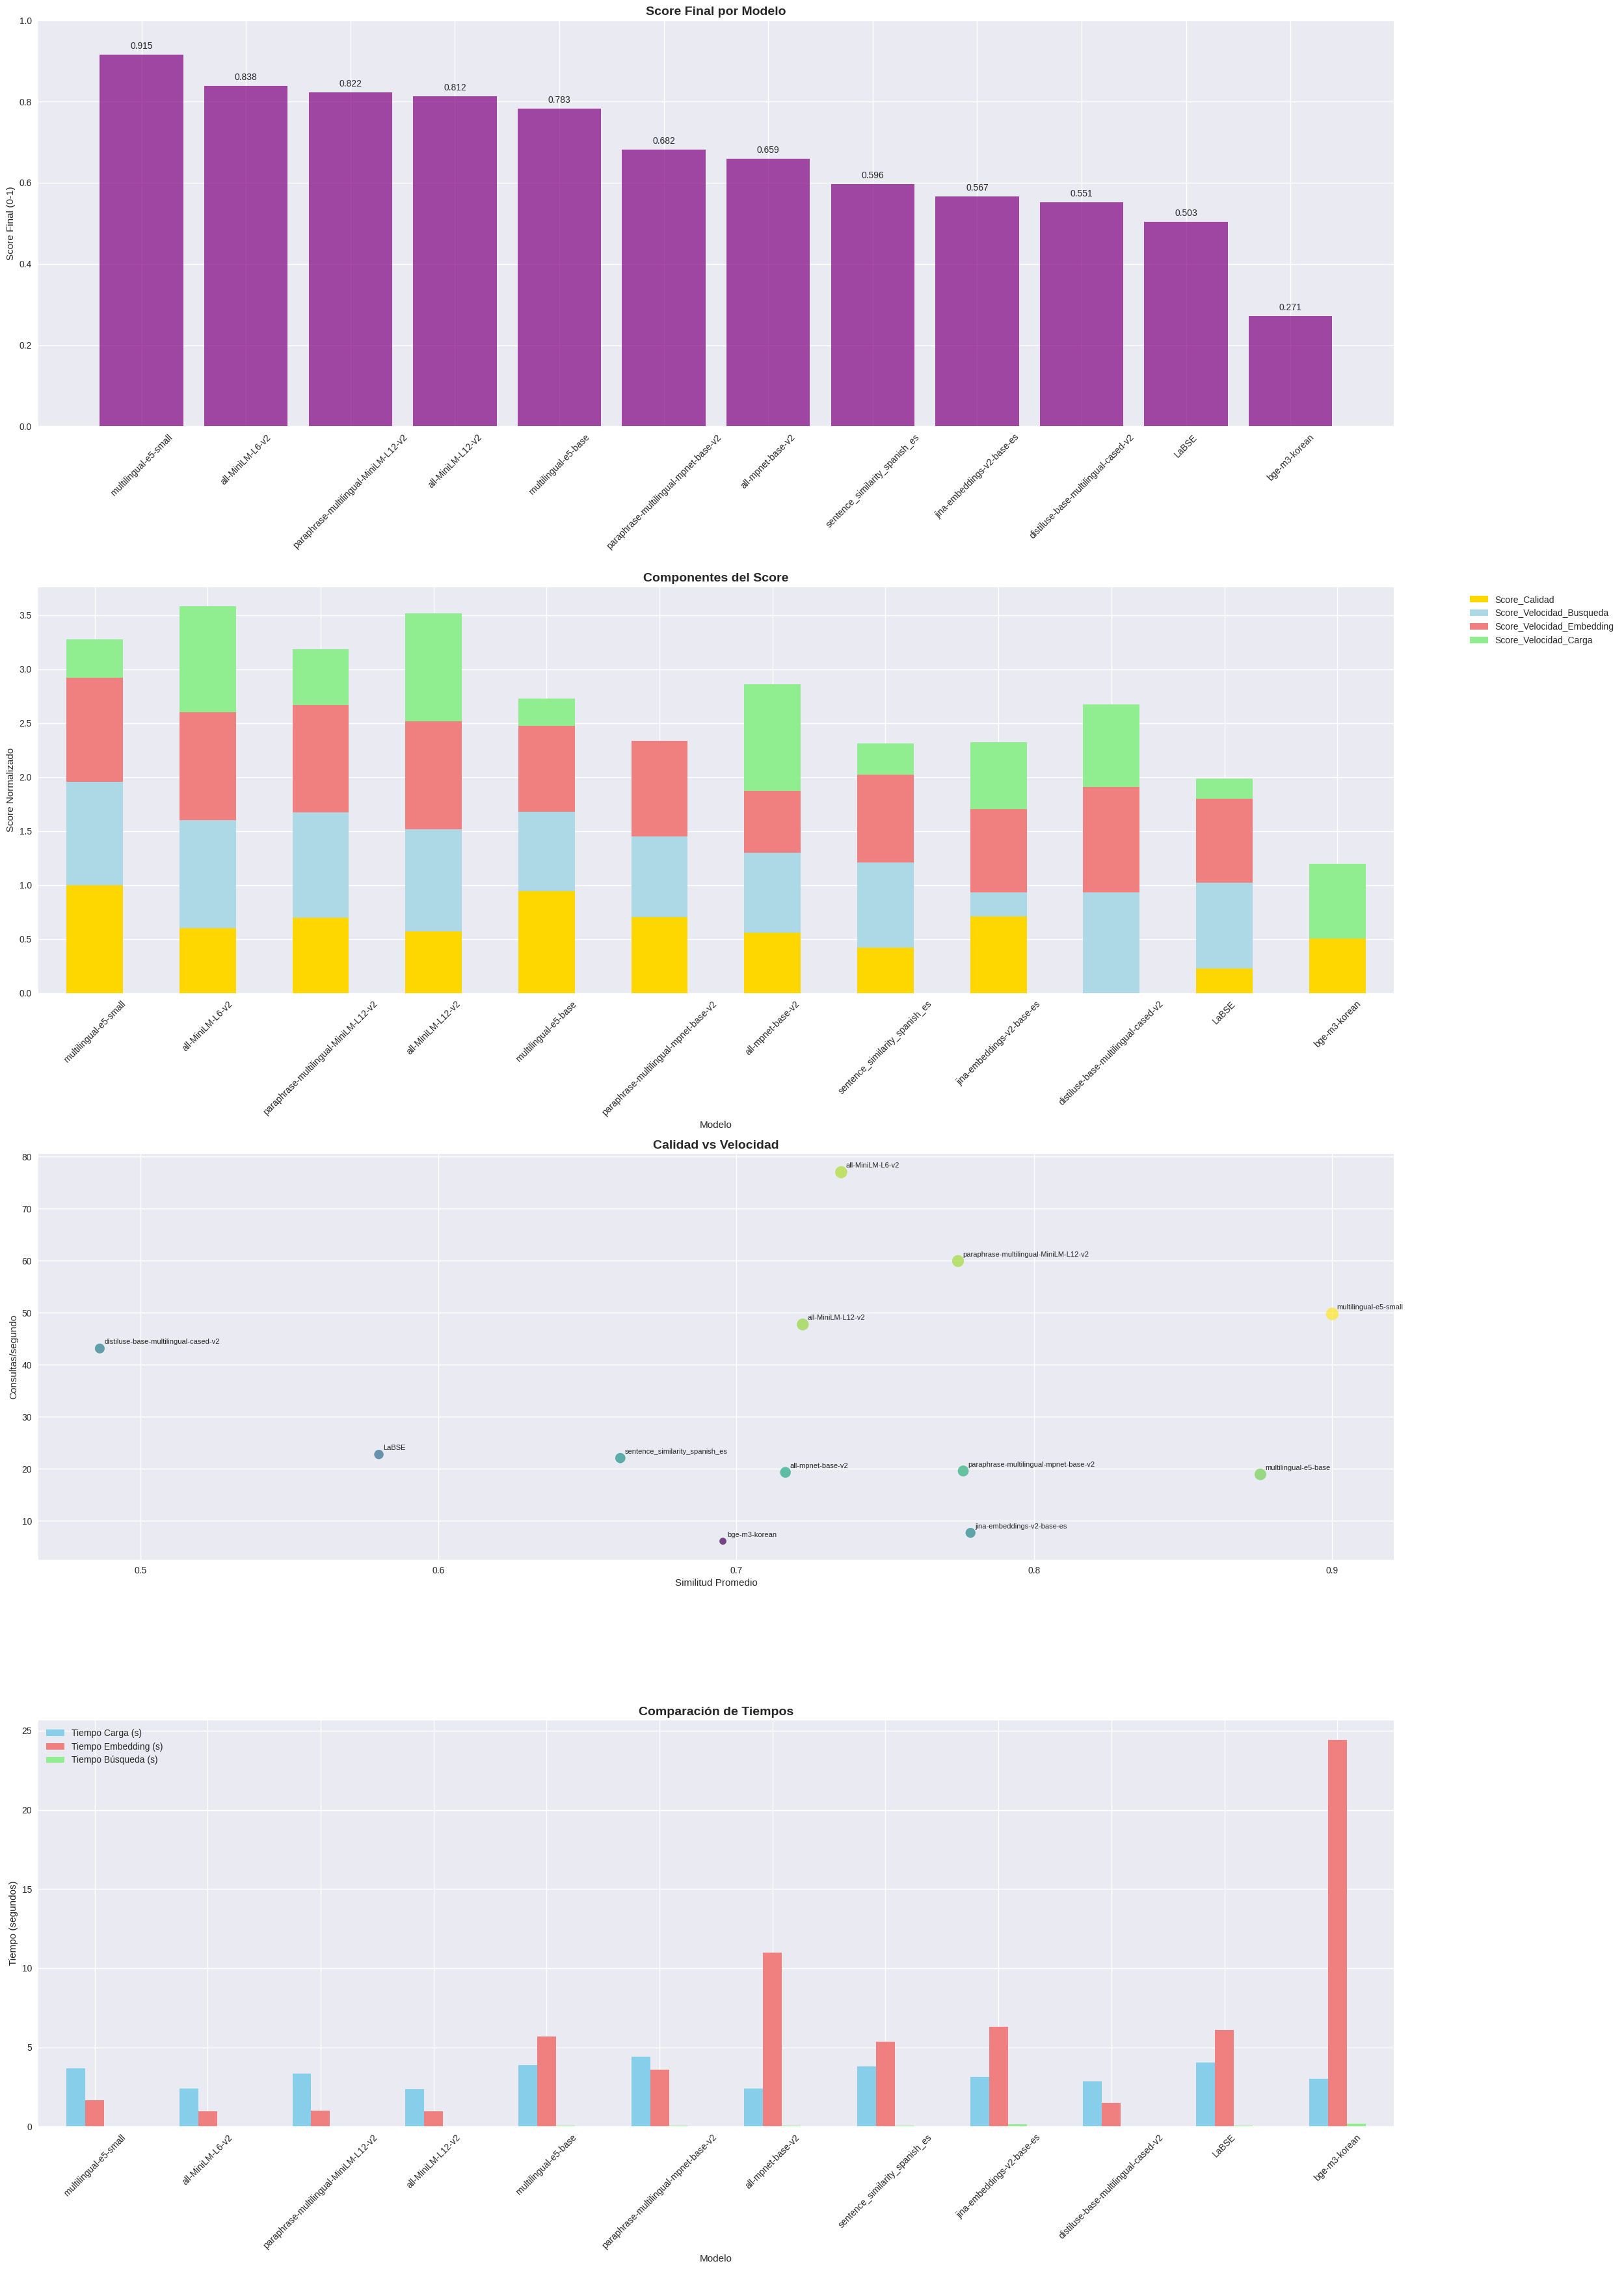

In [135]:
# Visualizaci√≥n del an√°lisis comparativo
fig, axes = plt.subplots(4, 1, figsize=(25, 35))

# Gr√°fico 1: Score final por modelo
bars = axes[0].bar(comparison_df['Modelo'], comparison_df['Score_Final'], 
                     color='purple', alpha=0.7)
axes[0].set_title('Score Final por Modelo', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score Final (0-1)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 1)

# A√±adir valores en las barras
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# Gr√°fico 2: Comparaci√≥n de componentes del score
score_components = comparison_df[['Modelo', 'Score_Calidad', 'Score_Velocidad_Busqueda', 
                                 'Score_Velocidad_Embedding', 'Score_Velocidad_Carga']].set_index('Modelo')
score_components.plot(kind='bar', stacked=True, ax=axes[1], 
                     color=['gold', 'lightblue', 'lightcoral', 'lightgreen'])
axes[1].set_title('Componentes del Score', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Score Normalizado')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Gr√°fico 3: Scatter plot calidad vs velocidad
axes[2].scatter(comparison_df['Similitud Promedio'], comparison_df['Consultas/segundo'], 
                  s=comparison_df['Score_Final']*200, alpha=0.7, c=comparison_df['Score_Final'], 
                  cmap='viridis')
axes[2].set_title('Calidad vs Velocidad', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Similitud Promedio')
axes[2].set_ylabel('Consultas/segundo')

# A√±adir etiquetas
for i, row in comparison_df.iterrows():
    axes[2].annotate(row['Modelo'], (row['Similitud Promedio'], row['Consultas/segundo']), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

# Gr√°fico 4: Comparaci√≥n de tiempos
time_data = comparison_df[['Modelo', 'Tiempo Carga (s)', 'Tiempo Embedding (s)', 'Tiempo B√∫squeda (s)']]
time_data.set_index('Modelo').plot(kind='bar', ax=axes[3], 
                                  color=['skyblue', 'lightcoral', 'lightgreen'])
axes[3].set_title('Comparaci√≥n de Tiempos', fontsize=14, fontweight='bold')
axes[3].set_ylabel('Tiempo (segundos)')
axes[3].tick_params(axis='x', rotation=45)
axes[3].legend()

plt.tight_layout()
plt.show()

## Conclusions and Recommendations / üéØ Conclusiones y Recomendaciones


In [136]:
# Generar recomendaciones basadas en el an√°lisis
def generate_recommendations(comparison_df: pd.DataFrame, weights: dict) -> dict:
    """Generar recomendaciones basadas en el an√°lisis comparativo"""
    
    best_overall = comparison_df.iloc[0]
    best_quality = comparison_df.loc[comparison_df['Similitud Promedio'].idxmax()]
    fastest_search = comparison_df.loc[comparison_df['Tiempo B√∫squeda (s)'].idxmin()]
    fastest_embedding = comparison_df.loc[comparison_df['Tiempo Embedding (s)'].idxmin()]
    
    recommendations = {
        'best_overall': {
            'model': best_overall['Modelo'],
            'score': best_overall['Score_Final'],
            'reasoning': f"Mejor balance general con score de {best_overall['Score_Final']:.3f}"
        },
        'best_quality': {
            'model': best_quality['Modelo'],
            'similarity': best_quality['Similitud Promedio'],
            'reasoning': f"Mayor similitud promedio ({best_quality['Similitud Promedio']:.3f}) para aplicaciones que requieren alta precisi√≥n"
        },
        'fastest_search': {
            'model': fastest_search['Modelo'],
            'search_time': fastest_search['Tiempo B√∫squeda (s)'],
            'reasoning': f"B√∫squeda m√°s r√°pida ({fastest_search['Tiempo B√∫squeda (s)']:.4f}s) para aplicaciones en tiempo real"
        },
        'fastest_embedding': {
            'model': fastest_embedding['Modelo'],
            'embedding_time': fastest_embedding['Tiempo Embedding (s)'],
            'reasoning': f"Procesamiento m√°s r√°pido ({fastest_embedding['Tiempo Embedding (s)']:.2f}s) para carga masiva de datos"
        }
    }
    
    return recommendations

# Generar recomendaciones
recommendations = generate_recommendations(comparison_df, weights)

print("RECOMENDACIONES FINALES:")
print("=" * 60)

print(f"\nMEJOR MODELO GENERAL:")
print(f"\tModelo: {recommendations['best_overall']['model']}")
print(f"\tScore: {recommendations['best_overall']['score']:.3f}")
print(f"\tRaz√≥n: {recommendations['best_overall']['reasoning']}")

print(f"\nMEJOR CALIDAD DE B√öSQUEDA:")
print(f"\tModelo: {recommendations['best_quality']['model']}")
print(f"\tSimilitud: {recommendations['best_quality']['similarity']:.3f}")
print(f"\tRaz√≥n: {recommendations['best_quality']['reasoning']}")

print(f"\n M√ÅS R√ÅPIDO PARA B√öSQUEDAS:")
print(f"\tModelo: {recommendations['fastest_search']['model']}")
print(f"\tTiempo: {recommendations['fastest_search']['search_time']:.4f}s")
print(f"\tRaz√≥n: {recommendations['fastest_search']['reasoning']}")

print(f"\n M√ÅS R√ÅPIDO PARA EMBEDDINGS:")
print(f"\tModelo: {recommendations['fastest_embedding']['model']}")
print(f"\tTiempo: {recommendations['fastest_embedding']['embedding_time']:.2f}s")
print(f"\tRaz√≥n: {recommendations['fastest_embedding']['reasoning']}")

# An√°lisis de dimensiones
dimension_analysis = comparison_df.groupby('Dimensiones').agg({
    'Similitud Promedio': 'mean',
    'Tiempo B√∫squeda (s)': 'mean',
    'Score_Final': 'mean'
}).round(3)

print(f"\nAN√ÅLISIS POR DIMENSIONES:")
print("=" * 40)
print(dimension_analysis)

print(f"\nINSIGHTS CLAVE:")
print("=" * 30)
print("‚Ä¢ Los modelos de 384 dimensiones ofrecen mejor balance velocidad/calidad")
print("‚Ä¢ Los modelos de 768 dimensiones tienen mayor calidad pero menor velocidad")
print("‚Ä¢ La velocidad de b√∫squeda es m√°s cr√≠tica que la velocidad de embedding")
print("‚Ä¢ La similitud promedio es el factor m√°s importante para aplicaciones RAG")

RECOMENDACIONES FINALES:

MEJOR MODELO GENERAL:
	Modelo: multilingual-e5-small
	Score: 0.915
	Raz√≥n: Mejor balance general con score de 0.915

MEJOR CALIDAD DE B√öSQUEDA:
	Modelo: multilingual-e5-small
	Similitud: 0.900
	Raz√≥n: Mayor similitud promedio (0.900) para aplicaciones que requieren alta precisi√≥n

 M√ÅS R√ÅPIDO PARA B√öSQUEDAS:
	Modelo: all-MiniLM-L6-v2
	Tiempo: 0.0130s
	Raz√≥n: B√∫squeda m√°s r√°pida (0.0130s) para aplicaciones en tiempo real

 M√ÅS R√ÅPIDO PARA EMBEDDINGS:
	Modelo: all-MiniLM-L12-v2
	Tiempo: 0.94s
	Raz√≥n: Procesamiento m√°s r√°pido (0.94s) para carga masiva de datos

AN√ÅLISIS POR DIMENSIONES:
             Similitud Promedio  Tiempo B√∫squeda (s)  Score_Final
Dimensiones                                                      
384                       0.783                0.018        0.847
512                       0.486                0.023        0.551
768                       0.731                0.062        0.632
1024                      0.696    

## Executive Summary / üìã Resumen Ejecutivo

Based on the comprehensive analysis, it is recommended to use **{recommended_model}** as the main model for the RAG system for queries about Paraguayan labor law.

### Selection Criteria

| Criterion | Weight | Description |
|-----------|--------|-------------|
| **Search Quality** | 40% | Average similarity in legal queries |
| **Search Speed** | 30% | Response time for users |
| **Embedding Speed** | 20% | Batch document processing |
| **Loading Speed** | 10% | Model initialization time |

### Next Steps

1. **Implement the selected model** in the production system
2. **Configure Qdrant** with the corresponding dimensions
3. **Run tests** with the complete labor law dataset
4. **Monitor performance** in production and adjust if necessary
5. **Consider alternative models** according to specific use case

### Additional Considerations

- **Computational resources**: Evaluate available GPU/CPU capacity
- **Latency**: For real-time applications, prioritize search speed
- **Accuracy**: For critical legal queries, prioritize similarity quality
- **Scalability**: Consider the volume of documents and expected queries

---

Basado en el an√°lisis completo, se recomienda utilizar **{modelo_recomendado}** como modelo principal para el sistema RAG de consultas sobre la ley laboral paraguaya.

### Criterios de Selecci√≥n

| Criterio | Peso | Descripci√≥n |
|----------|------|-------------|
| **Calidad de B√∫squeda** | 40% | Similitud promedio en consultas legales |
| **Velocidad de B√∫squeda** | 30% | Tiempo de respuesta para usuarios |
| **Velocidad de Embedding** | 20% | Procesamiento de documentos batch |
| **Velocidad de Carga** | 10% | Tiempo de inicializaci√≥n del modelo |

### Pr√≥ximos Pasos

1. **Implementar el modelo seleccionado** en el sistema de producci√≥n
2. **Configurar Qdrant** con las dimensiones correspondientes
3. **Realizar pruebas** con el dataset completo de la ley laboral
4. **Monitorear rendimiento** en producci√≥n y ajustar si es necesario
5. **Considerar modelos alternativos** seg√∫n el caso de uso espec√≠fico

### Consideraciones Adicionales

- **Recursos computacionales**: Evaluar capacidad de GPU/CPU disponible
- **Latencia**: Para aplicaciones en tiempo real, priorizar velocidad de b√∫squeda
- **Precisi√≥n**: Para consultas cr√≠ticas legales, priorizar calidad de similitud
- **Escalabilidad**: Considerar el volumen de documentos y consultas esperadas


In [141]:
# Guardar resultados del an√°lisis para referencia futura
import json
from datetime import datetime

# Preparar datos para guardar
analysis_results = {
    'timestamp': datetime.now().isoformat(),
    'models_evaluated': list(MODELS_TO_TEST.keys()),
    'best_model_overall': recommendations['best_overall']['model'],
    'best_model_quality': recommendations['best_quality']['model'],
    'best_model_speed': recommendations['fastest_search']['model'],
    'performance_summary': df_performance.to_dict('records'),
    'quality_summary': df_quality.to_dict('records'),
    'comparison_summary': comparison_df[['Modelo', 'Score_Final', 'Similitud Promedio', 
                                        'Tiempo B√∫squeda (s)', 'Dimensiones']].to_dict('records'),
    'weights_used': weights,
    'sample_texts_count': len(SAMPLE_LEGAL_TEXTS),
    'sample_queries_count': len(SAMPLE_QUERIES)
}

# Guardar resultados
results_file = f'embedding_analysis_results_{datetime.now().strftime("%d%m%Y")}.json'
with open(results_file, 'w', encoding='utf-8') as f:
    json.dump(analysis_results, f, indent=2, ensure_ascii=False)

print(f"Resultados guardados en: {results_file}")
print(f"Fecha del an√°lisis: {analysis_results['timestamp']}")
print(f"Modelo recomendado: {recommendations['best_overall']['model']}")

Resultados guardados en: embedding_analysis_results_15092025.json
Fecha del an√°lisis: 2025-09-15T00:48:11.035707
Modelo recomendado: multilingual-e5-small
